<a href="https://colab.research.google.com/github/DrKenReid/GoodReads-Analysis/blob/main/GoodReads_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoodReads Data Analysis Project
## Introduction
This notebook provides a fairly comprehensive analysis of personal reading habits using data exported from GoodReads. It showcases a range of data science techniques and technologies, including data cleaning, exploratory data analysis, machine learning, and data visualization. The analysis is implemented in Python, utilizing libraries such as pandas, scikit-learn, TensorFlow, and seaborn.

The Goodreads data can be found on your profile on GoodReads, under My Books -> Import/Export at the bottom left of the screen.
I've included my stats file for reference, but feel free to replace this file with your own.

Modify the below code section to look at your own CSV, perhaps in a Google drive or uploaded CSV, or do as I have currently running in the second code section and point at the file uploaded on GitHub or elsewhere.


In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
raw_goodreads = pd.read_csv('https://raw.githubusercontent.com/DrKenReid/GoodReadsCSV/main/goodreads_library_export.csv')
raw_goodreads.size

31563

I use this tool to improve the data by adding genre information: [https://github.com/PaulKlinger/Enhance-GoodReads-Export](https://github.com/PaulKlinger/Enhance-GoodReads-Export).

Let's have a look at the data and see what's what:

In [3]:
raw_goodreads.head()

Book Id                                              Title  \
0  49247150                                  Tell Me How to Be   
1   3097601                                      Suicide Notes   
2    194746                                    No Longer Human   
3  56683041                Shadeslinger (The Ripple System #1)   
4   7779696  Son of Hamas: A Gripping Account of Terror, Be...   

                Author            Author l-f          Additional Authors  \
0           Neel Patel           Patel, Neel                         NaN   
1  Michael Thomas Ford  Ford, Michael Thomas                         NaN   
2          Osamu Dazai          Dazai, Osamu                Donald Keene   
3          Kyle Kirrin          Kirrin, Kyle                         NaN   
4  Mosab Hassan Yousef  Yousef, Mosab Hassan  مصعب حسن يوسف, Ron Brackin   

            ISBN            ISBN13  My Rating  Average Rating       Publisher  \
0  ="1250184975"  ="9781250184979"          0            4.16  Flatiron Books   
1  ="0060737557"  ="9780060737559"          0            3.81   HarperCollins   
2            =""               =""          0            3.99  New Directions   
3            =""               =""          0            4.36    Portal Books   
4  ="1414333072"  ="9781414333076"          0            4.22       SaltRiver   

   ... Bookshelves with positions    Exclusive Shelf  My Review  Spoiler  \
0  ...             to-read (#642)            to-read        NaN      NaN   
1  ...             to-read (#641)            to-read        NaN      NaN   
2  ...             to-read (#640)            to-read        NaN      NaN   
3  ...     currently-reading (#4)  currently-reading        NaN      NaN   
4  ...     currently-reading (#3)  currently-reading        NaN      NaN   

  Private Notes Read Count Owned Copies read_dates  \
0           NaN          0            0        NaN   
1           NaN          0            0        NaN   
2           NaN          0            0        NaN   
3           NaN          1            0        NaN   
4           NaN          1            0        NaN   

                                              genres n_ratings  
0  Fiction|160;Lgbtq|77;Lgbt|54;Contemporary|50;Q...      5019  
1  Young Adult|642;Mental Health|467;Contemporary...     47666  
2  Fiction|2391;Japanese Literature|1006;Japanese...    172323  
3                   Litrpg|177;Fantasy|77;Audible|21      3677  
4  Non Fiction|286;Biography|200;History|130;Nonf...     14549  

[5 rows x 27 columns]

We should be wary going forward, some of the data is problematic:
1. There are many fields with missing data, such as Additional Authors, ISBN, Publisher, Number of Pages.
2. It seems that when a user marks a book as read but doesn't review it, the book rating defaults to '0'. This would be problematic in our analysis if we didn't notice this.
3. The date added field is in YYYY/MM/DD format. I prefer this personally, but we need to take note of this if we plan to parse this information for plotting.
4. This file is a CSV (comma separated value file), so commas are of utmost importance. Thankfully, it seems the commas in additional authors, titles, etc., are escaped (meaning these commas are explicitly highlighted as "not used for separating the data").
5. There is information missing: genres, for example, or gender of authors. This data would be useful in analysing the type of books we read, so we either must find this information elsewhere or not use it.

Looking at the head of this data doesn't explain all the issues, there may be others that appear during analysis, so we must be wary going forward. With that in mind, let's use a powerful pandas method for inspecting all of the data (even if it's useful to do so or not for some columns!)

In [4]:
raw_goodreads.describe()

Book Id    My Rating  Average Rating  Number of Pages  \
count  1.169000e+03  1169.000000     1169.000000      1156.000000   
mean   2.896703e+07     1.654405        4.120719       397.649654   
std    4.177764e+07     2.066195        0.341448       291.439768   
min    1.000000e+00     0.000000        0.000000         0.000000   
25%    8.918700e+04     0.000000        3.980000       259.000000   
50%    1.589444e+07     0.000000        4.140000       355.000000   
75%    4.370871e+07     4.000000        4.310000       488.000000   
max    2.162272e+08     5.000000        4.820000      7000.000000   

       Year Published  Original Publication Year  Private Notes   Read Count  \
count     1163.000000                1111.000000            0.0  1169.000000   
mean      2010.010318                1968.376238            NaN     0.457656   
std         11.085797                 232.673445            NaN     0.547530   
min       1925.000000                -700.000000            NaN     0.000000   
25%       2003.000000                1985.000000            NaN     0.000000   
50%       2012.000000                2008.000000            NaN     0.000000   
75%       2019.000000                2018.000000            NaN     1.000000   
max       2024.000000                2024.000000            NaN     2.000000   

       Owned Copies     n_ratings  
count        1169.0  1.169000e+03  
mean            0.0  3.342791e+05  
std             0.0  8.150700e+05  
min             0.0  0.000000e+00  
25%             0.0  4.954000e+03  
50%             0.0  4.017300e+04  
75%             0.0  2.666740e+05  
max             0.0  1.025473e+07

The first thing I notice in the description was one of the issues we noticed before: the "My Rating" data is massively skewed by all the zeroes. So all the books we have added to our "to-read" list is causing erroneous statistics. To get around this type of issue, we can just tell pandas to ignore cells that contain zero when using that column.

Here, we use the .loc accessor to filter the rows where the 'Average Rating' column is not equal to zero. The second argument of .loc is used to select the column(s) to apply the mean function on. A bit verbose, but it saves us storing the data twice:

In [5]:
# mean is calculated with a standard mean() call, but we're only looking at rows where the "My Rating" column isn't 0!
mean_rating = raw_goodreads.loc[raw_goodreads['My Rating'] != 0, 'My Rating'].mean()
print('The mean rating of your books is: %f / 5!' % mean_rating)

The mean rating of your books is: 3.930894 / 5!


Since Seaborn is built on top of Matplotlib, it provides a high-level interface for drawing informative statistical graphics, and it also work well with Pandas DataFrames, so it's a great choice for this script. We must import it first:


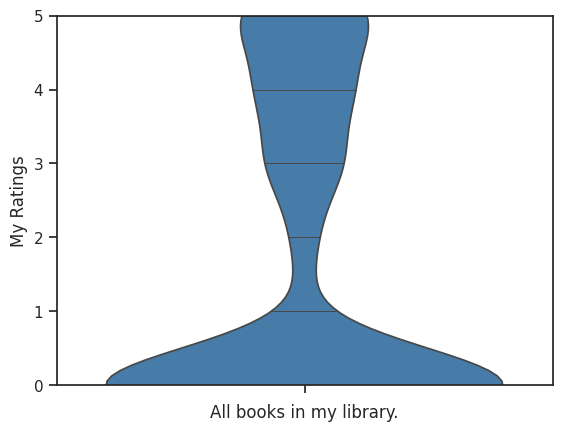

In [6]:
"""
This script creates a violin plot of book ratings using Seaborn and Matplotlib.
It uses a colorblind-friendly palette.
"""

import seaborn as sns
import matplotlib.pyplot as plt

# Apply the theme
# Set the color palette and overall style for the plots
sns.set_theme(style="ticks")
sns.set_palette("colorblind")

def create_rating_violin_plot(data):
    """
    Create a violin plot of book ratings.

    Args:
    data (pandas.DataFrame): DataFrame containing book ratings data

    Returns:
    matplotlib.axes.Axes: The plot axes object
    """
    # Create the violin plot
    # Violin plots show the distribution of data across different categories
    # 'inner="stick"' adds individual data points inside the violin
    plot = sns.violinplot(y="My Rating", data=data, inner="stick", color='#377eb8')

    # Set labels and limits
    plot.set(xlabel='All books in my library.', ylabel='My Ratings')
    plot.set_ylim(0, 5)  # Assuming ratings are on a 0-5 scale

    return plot

# run
plot = create_rating_violin_plot(raw_goodreads)
plt.show()

Obviously, that's problematic. Let's fix this code so the violin plot excludes zeroes as before:

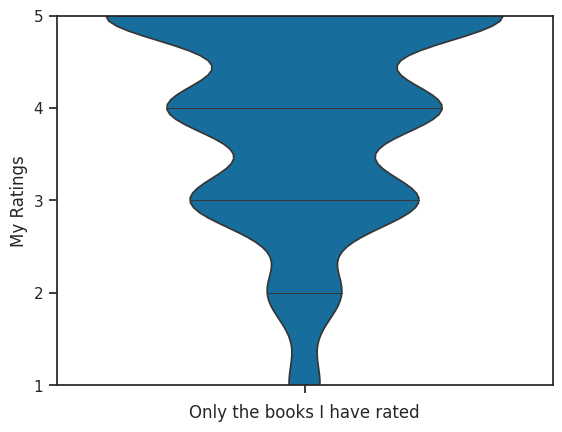

In [7]:
# store the non-zero version of the data
cleansed_my_ratings = raw_goodreads.loc[raw_goodreads["My Rating"] != 0]

# create the plot
plot = sns.violinplot(y="My Rating", data=cleansed_my_ratings, inner="stick")

# Set labels
plot.set(xlabel='Only the books I have rated', ylabel='My Ratings')

# Set y-axis limits
plot.set_ylim(1, 5)

# Set y-axis ticks to whole numbers
plot.set_yticks([1, 2, 3, 4, 5])

# run
plt.show()

That looks much more sensible. In my data, it shows I am far from a normal distribution in my book reviews! Not abnormal, since people likely choose books they're likely to enjoy.

Now, rather than having to manually clean the data *every time we want to use it*, it's preferable to create a new file with cleansed data. I suggest we:
* Modify the column names, as spaces and such can be irritating when referring to columns, let's stick with the Python snake case.
* Modify the dtypes of the columns and make sure they represent the data well, and make our lives easier when analyzing the data.
* Separate into two bookshelves to represent the following. You can add your own code here to add in other bookshelves, too.
   * 'read'
   * 'want to read'
* Save the data to new files, so we can use it in the future without having to do all this work again!

In [8]:
# 1) Modify the column names - creating a new dataframe
# Creating a copy ensures we don't modify the original dataframe
mutable_raw = raw_goodreads.copy()

# Rename columns for clarity and consistency
mutable_raw.columns = ['book_id', 'title', 'author', 'author_surname_to_firstname', 'additional_authors',
                       'isbn', 'isbn13', 'my_rating', 'average_rating', 'publisher', 'binding',
                       'number_of_pages', 'year_published', 'original_publication_year', 'date_read',
                       'date_added', 'bookshelves', 'bookshelves_with_positions', 'exlusive_shelf',
                       'my_review', 'spoiler', 'private_notes', 'read_count', 'owned_copies',
                       'read_dates','genres','number_of_ratings']

# 2) Modify the data types
# Convert columns to appropriate data types for analysis
mutable_raw['date_added'] = pd.to_datetime(mutable_raw['date_added'])
# Note: 'date_read' is not converted to datetime as it can represent multiple dates

# Convert numeric columns, using 'coerce' to handle any non-numeric values
numeric_columns = ['year_published', 'original_publication_year', 'number_of_pages',
                   'my_rating', 'average_rating', 'read_count', 'owned_copies', 'book_id']
for col in numeric_columns:
    mutable_raw[col] = pd.to_numeric(mutable_raw[col], errors='coerce')

# 3a) Store the 'read' bookshelf
# Filter books that have been rated (assuming unrated books haven't been read)
read_bookshelf = mutable_raw.loc[mutable_raw["my_rating"] != 0]

# 3b) Store the "to-read" bookshelf
# Filter books that haven't been rated yet
to_read_bookshelf = mutable_raw.loc[mutable_raw["my_rating"] == 0]

# 4) Save the data to pickle files
# Pickle files preserve the data types and are faster to read/write
read_bookshelf.to_pickle('read_bookshelf.pkl')
to_read_bookshelf.to_pickle('to_read_bookshelf.pkl')

# Alternative: Save as CSV files
# CSV files are more portable but may not preserve all data types
# read_bookshelf.to_csv('data/read_bookshelf.csv', index=False)
# to_read_bookshelf.to_csv('data/to_read_bookshelf.csv', index=False)

# Verify the data types after modifications
print(mutable_raw.dtypes)

book_id                                 int64
title                                  object
author                                 object
author_surname_to_firstname            object
additional_authors                     object
isbn                                   object
isbn13                                 object
my_rating                               int64
average_rating                        float64
publisher                              object
binding                                object
number_of_pages                       float64
year_published                        float64
original_publication_year             float64
date_read                              object
date_added                     datetime64[ns]
bookshelves                            object
bookshelves_with_positions             object
exlusive_shelf                         object
my_review                              object
spoiler                                object
private_notes                     

Next, let's compare how different our personal ratings are against the community's ratings.

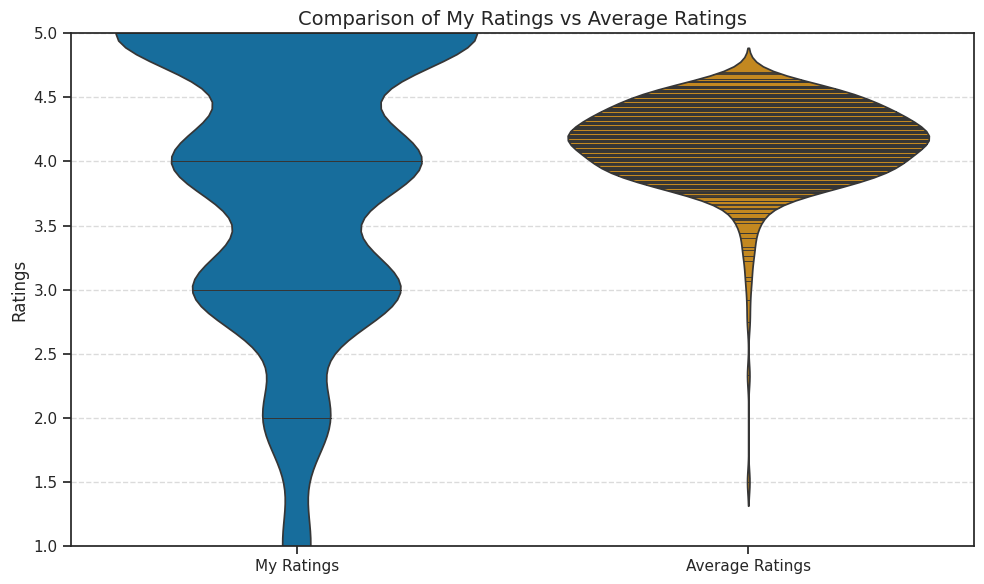

In [9]:
# Select two columns of interest and create a new dataframe
# This focuses the analysis on specific variables
ratings_comparison = read_bookshelf.loc[:, ['my_rating', 'average_rating']]

def create_ratings_comparison_plot(data):
    """
    Create a violin plot comparing personal ratings to average ratings.

    Args:
    data (pandas.DataFrame): DataFrame containing 'my_rating' and 'average_rating'

    Returns:
    matplotlib.figure.Figure: The plot figure
    """
    # Create a new figure with specified size
    plt.figure(figsize=(10, 6))

    # Create the violin plot
    # Violin plots show the distribution of data across categories
    ratings_plot = sns.violinplot(data=data, inner="stick")

    # Set the y label and the range for the y-axis
    ratings_plot.set(xlabel='', ylabel='Ratings')
    ratings_plot.set_ylim(1, 5)

    # Set x-axis labels
    x_labels = ["My Ratings", "Average Ratings"]
    plt.xticks(range(len(x_labels)), x_labels)

    # Add a title to the plot
    plt.title("Comparison of My Ratings vs Average Ratings", fontsize=14)

    # Adjust y-axis ticks to include half steps
    # This provides more detailed view of the ratings distribution
    ratings_plot.set_yticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

    # Add a grid for better readability
    # Grids can help in comparing values across categories
    ratings_plot.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to prevent clipping
    plt.tight_layout()

    return plt.gcf()

# Create and display the plot
fig = create_ratings_comparison_plot(ratings_comparison)
plt.show()

We can always just make use of the describe method, of course:

In [10]:
ratings_comparison.describe()

my_rating  average_rating
count  492.000000      492.000000
mean     3.930894        4.135711
std      1.090274        0.322615
min      1.000000        1.500000
25%      3.000000        3.960000
50%      4.000000        4.160000
75%      5.000000        4.362500
max      5.000000        4.700000

Let's dig deeper into the differences between my ratings and the community ratings, by creating a histogram known as a "population pyramid". The population pyramid plot visually compares the distribution of "my rating" versus the "average rating" of books, with each side representing a different rating category and the height of each section indicating the count of books rated in that category.

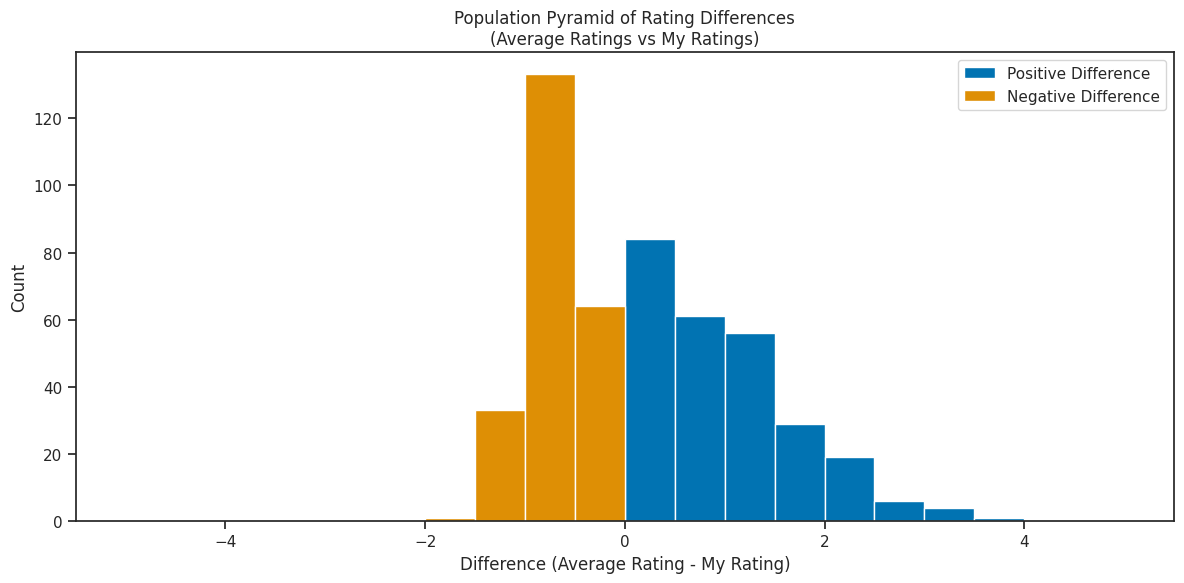

In [11]:
# Calculate the difference between 'my_rating' and 'average_rating'
comparison_data = read_bookshelf[['my_rating', 'average_rating']]
comparison_data = comparison_data.assign(difference = comparison_data['average_rating'] - comparison_data['my_rating'])

def create_rating_difference_histogram(data):
    """
    Create a population pyramid histogram of rating differences.

    Args:
    data (pandas.DataFrame): DataFrame containing 'difference' column

    Returns:
    matplotlib.figure.Figure: The plot figure
    """
    # Separate positive and negative differences
    # This allows for creating a population pyramid-like visualization
    positive_differences = data[data['difference'] > 0]['difference']
    negative_differences = data[data['difference'] < 0]['difference']

    # Define the bins for the histogram
    # Using small bin sizes (0.1) for detailed distribution view
    bins = [x * 0.1 for x in range(-50, 55, 5)]

    # Create the histogram
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot positive differences
    ax.hist(positive_differences, bins=bins, histtype='bar',
            stacked=True, label='Positive Difference')

    # Plot negative differences
    ax.hist(negative_differences, bins=bins, histtype='bar',
            stacked=True, label='Negative Difference')

    # Customize the plot
    ax.set_xlabel('Difference (Average Rating - My Rating)')
    ax.set_ylabel('Count')
    ax.legend()
    ax.set_title('Population Pyramid of Rating Differences\n(Average Ratings vs My Ratings)')

    # Adjust layout to prevent clipping
    plt.tight_layout()

    return fig

# Create and display the plot
fig = create_rating_difference_histogram(comparison_data)
plt.show()

This plot visualizes the top 25 differences between "my rating" and "average rating" of books, with each bar representing the number of book ratings with x amount of difference

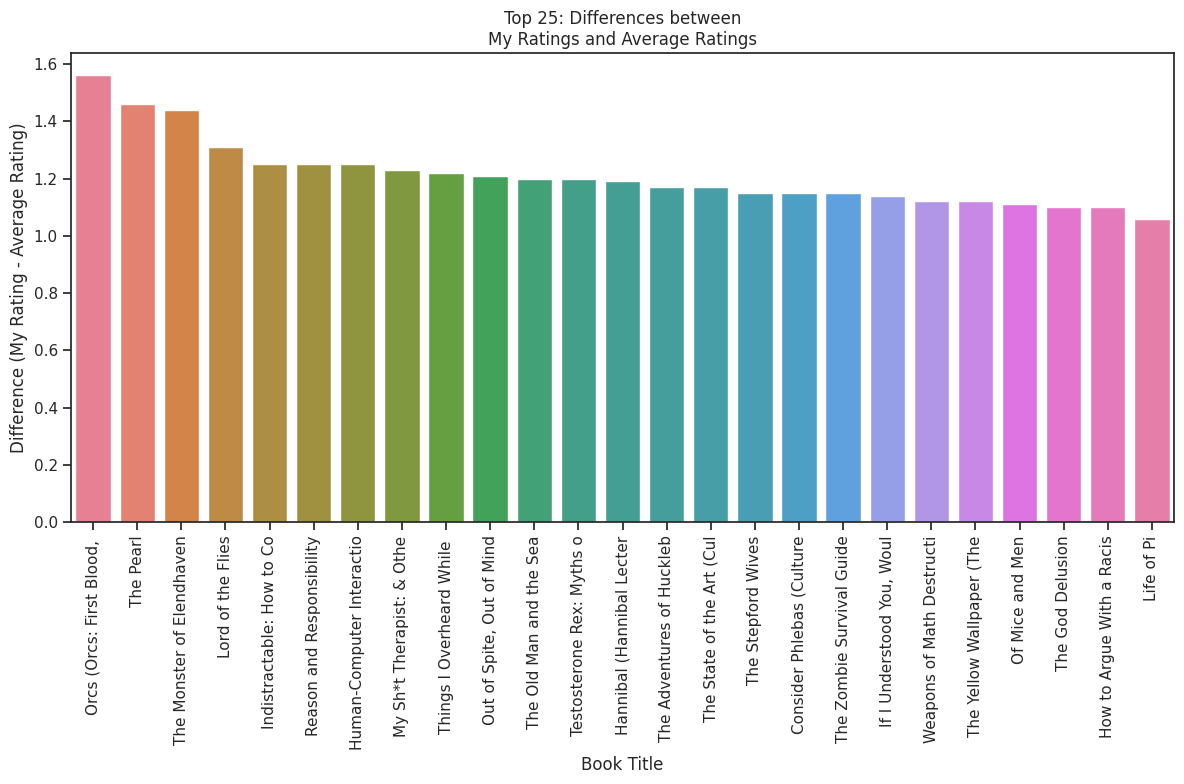

In [12]:
# Create a new dataframe to store the difference calculation
difference_data = read_bookshelf[['title', 'my_rating', 'average_rating']].copy()
difference_data['difference'] = difference_data['my_rating'] - difference_data['average_rating']

def create_top_differences_barplot(data, n=25, title_length=25):
    """
    Create a bar plot of the top N books with the largest difference between personal and average ratings.

    Args:
    data (pandas.DataFrame): DataFrame containing 'title', 'my_rating', 'average_rating', and 'difference' columns
    n (int): Number of top differences to display
    title_length (int): Maximum length of book titles to display

    Returns:
    matplotlib.figure.Figure: The plot figure
    """
    # Sort in descending order of difference
    sorted_data = data.sort_values(by='difference', ascending=False)

    # Select top N differences
    top_n = sorted_data.head(n)

    # Truncate titles for better visualization
    top_n = top_n.assign(title=top_n['title'].apply(lambda x: x[:title_length]))

    # Create the bar plot
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=top_n, x='title', y='difference', hue='title', legend=False)

    # Customize the plot
    plt.xlabel('Book Title')
    plt.ylabel('Difference (My Rating - Average Rating)')
    plt.title(f'Top {n}: Differences between\nMy Ratings and Average Ratings')
    plt.xticks(rotation=90)

    # Adjust layout to prevent clipping
    plt.tight_layout()

    return plt.gcf()

# Create and display the plot
fig = create_top_differences_barplot(difference_data)
plt.show()

Let's do the opposite, too.

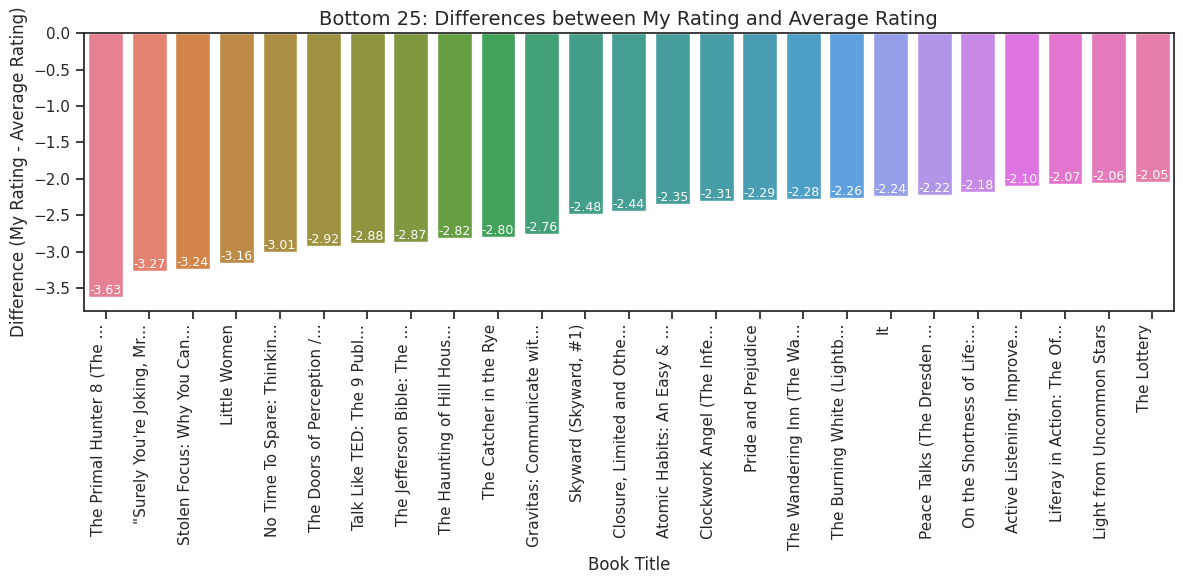

In [13]:
def create_bottom_differences_barplot(data, n=25, title_length=25):
    """
    Create a bar plot of the bottom N books with the largest negative difference
    between personal and average ratings.

    Args:
    data (pandas.DataFrame): DataFrame containing 'title', 'my_rating', 'average_rating', and 'difference' columns
    n (int): Number of bottom differences to display
    title_length (int): Maximum length of book titles to display

    Returns:
    matplotlib.figure.Figure: The plot figure
    """
    # Sort in ascending order to get the bottom differences
    sorted_data = data.sort_values(by='difference', ascending=True)

    # Select bottom N differences
    bottom_n = sorted_data.head(n)

    # Truncate titles for better visualization
    bottom_n = bottom_n.assign(title=bottom_n['title'].apply(lambda x: x[:title_length] + '...' if len(x) > title_length else x))

    # Create the plot
    plt.figure(figsize=(12, 6))  # Increase figure size for better readability

    # Create the bar plot
    ax = sns.barplot(data=bottom_n, x='title', y='difference', hue='title', legend=False)

    # Customize the plot
    plt.xlabel('Book Title', fontsize=12)
    plt.ylabel('Difference (My Rating - Average Rating)', fontsize=12)
    plt.title(f'Bottom {n}: Differences between My Rating and Average Rating', fontsize=14)
    plt.xticks(rotation=90, ha='right')  # Rotate labels and align them

    # Add value labels on the bars
    for i, v in enumerate(bottom_n['difference']):
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v < 0 else 'top', fontsize=9, color="white")

    # Adjust layout to prevent clipping
    plt.tight_layout()

    return plt.gcf()

# Create and display the plot
fig = create_bottom_differences_barplot(difference_data)
plt.show()

# Reviewed vs Not Reviewed
It's also nice to see how many books you've reviewed vs those you've just rated:

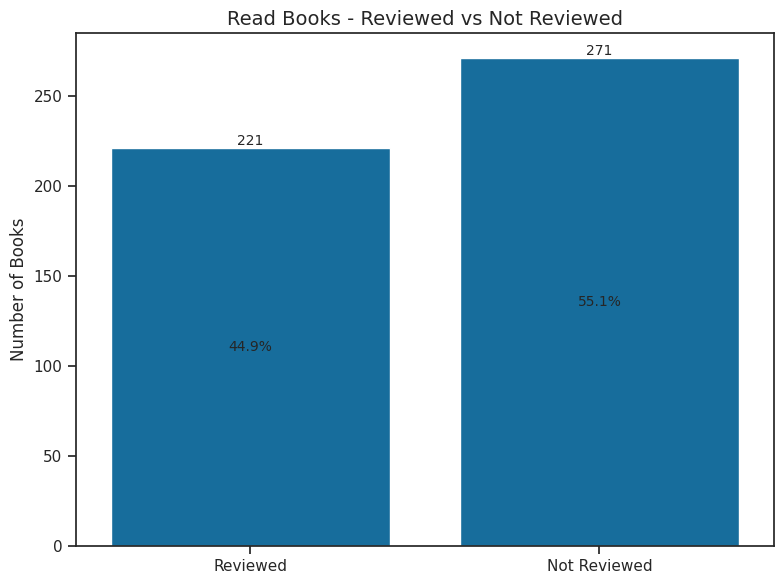

In [14]:
def analyze_review_counts(data):
    """
    Analyze and visualize the count of books with and without reviews.

    Args:
    data (pandas.DataFrame): DataFrame containing 'my_review' column

    Returns:
    matplotlib.figure.Figure: The plot figure
    """
    # Count number of read books with no review and with review
    # Using isna() and notna() to check for presence/absence of reviews
    no_review_count = data["my_review"].isna().sum()
    review_count = data["my_review"].notna().sum()

    # Combine into a DataFrame for ease of plotting
    # This step transforms the data into a format suitable for seaborn
    review_vs_not_reviewed_df = pd.DataFrame({
        'Count': [review_count, no_review_count],
        'Category': ['Reviewed', 'Not Reviewed']
    })

    # Create plot
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x='Category', y='Count', data=review_vs_not_reviewed_df)

    # Customize the plot
    plt.xlabel('')
    plt.ylabel('Number of Books', fontsize=12)
    plt.title('Read Books - Reviewed vs Not Reviewed', fontsize=14)

    # Add value labels on the bars
    for i, v in enumerate(review_vs_not_reviewed_df['Count']):
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

    # Add percentage labels
    total = review_count + no_review_count
    for i, v in enumerate(review_vs_not_reviewed_df['Count']):
        percentage = (v / total) * 100
        ax.text(i, v/2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)

    # Adjust layout to prevent clipping
    plt.tight_layout()

    return plt.gcf()

# Create and display the plot
fig = analyze_review_counts(read_bookshelf)
plt.show()

Let's make some 'buckets' or 'bins' to represent similar lengths of books you've read, and plot that. We could also do this for books you want to read, by changing the data source.

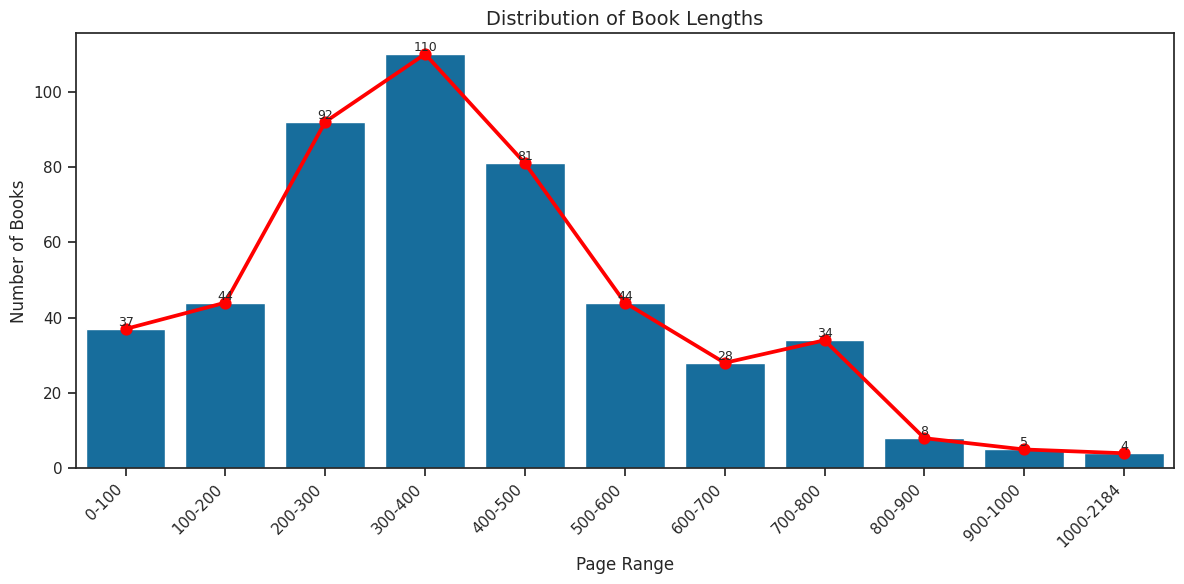

In [15]:
def analyze_book_length_distribution(data, max_bin=1000, bin_size=100):
    """
    Analyze and visualize the distribution of book lengths.

    Args:
    data (pandas.DataFrame): DataFrame containing 'number_of_pages' column
    max_bin (int): Maximum bin size before the last bin
    bin_size (int): Size of each bin

    Returns:
    matplotlib.figure.Figure: The plot figure
    """
    # Create bins for the number of pages
    # Using a list comprehension to create evenly spaced bins
    bins = list(range(0, max_bin + bin_size, bin_size))
    bins.append(int(data["number_of_pages"].max()))

    # Create labels for the bins
    # Using f-strings for formatting and zip to pair adjacent bin edges
    bin_labels = [f"{min_val}-{max_val}" for min_val, max_val in zip(bins[:-1], bins[1:])]

    # Bin the data using pd.cut
    # This creates a categorical variable from the continuous 'number_of_pages'
    book_pages_bins = pd.cut(data["number_of_pages"], bins, labels=bin_labels)

    # Count the number of books in each bin
    book_pages_df = pd.DataFrame({
        "Page_Range": bin_labels,
        "Count": pd.cut(data["number_of_pages"], bins).value_counts().sort_index()
    })

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Bar plot for count in each bin
    ax = sns.barplot(x='Page_Range', y='Count', data=book_pages_df)

    # Line plot to show trend
    sns.pointplot(x='Page_Range', y='Count', data=book_pages_df, color='red')

    # Customize the plot
    ax.set(xlabel='Page Range', ylabel='Number of Books')
    plt.title('Distribution of Book Lengths', fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Add value labels on the bars
    for i, v in enumerate(book_pages_df['Count']):
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

    # Adjust layout to prevent clipping
    plt.tight_layout()

    return plt.gcf()

# Create and display the plot
fig = analyze_book_length_distribution(read_bookshelf)
plt.show()

Does the time investment effect your rating? Let's find out!

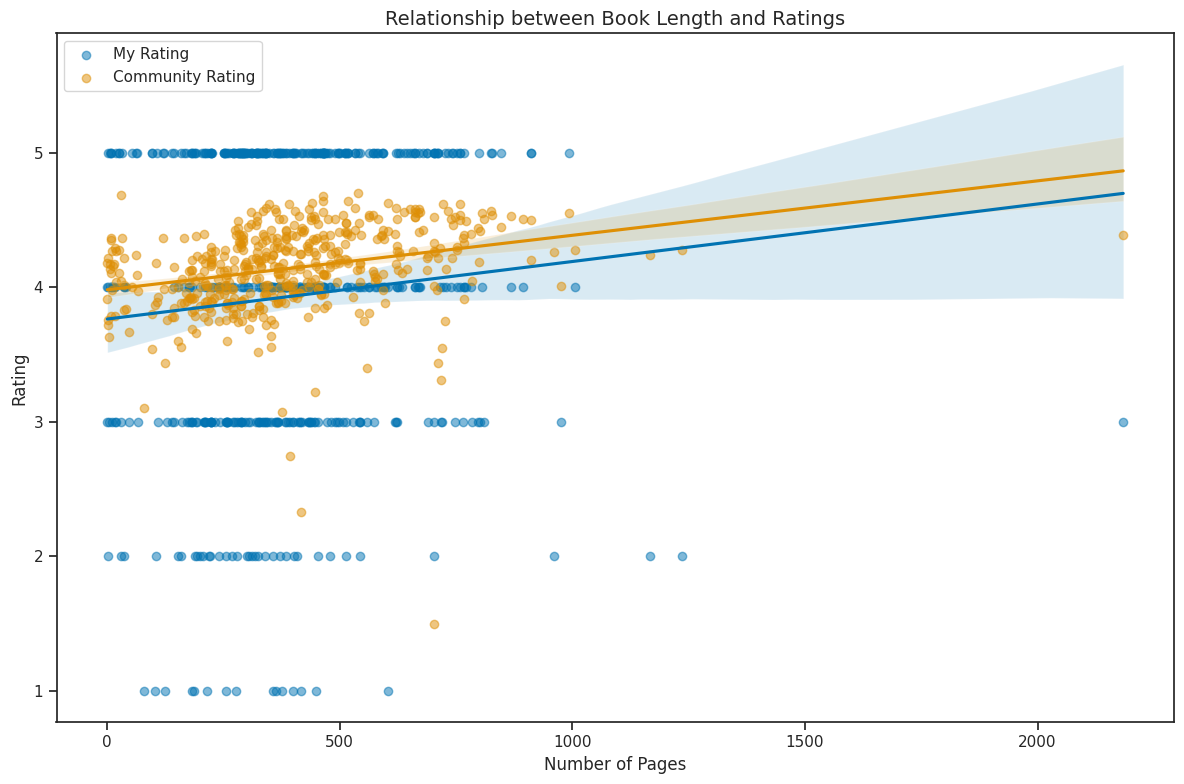

In [16]:
def analyze_ratings_vs_book_length(data):
    """
    Analyze and visualize the relationship between book length and ratings (personal and community).

    Args:
    data (pandas.DataFrame): DataFrame containing 'number_of_pages', 'my_rating', and 'average_rating' columns

    Returns:
    matplotlib.figure.Figure: The plot figure
    """
    # Create a figure and subplot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Regression plot for personal ratings vs number of pages
    sns.regplot(x="number_of_pages", y="my_rating", data=data,
                ax=ax, label='My Rating', scatter_kws={'alpha':0.5})

    # Regression plot for community ratings vs number of pages
    sns.regplot(x="number_of_pages", y="average_rating", data=data,
                ax=ax, label='Community Rating', scatter_kws={'alpha':0.5})

    # Customize the plot
    ax.set(xlabel='Number of Pages', ylabel='Rating')
    ax.set_title('Relationship between Book Length and Ratings', fontsize=14)

    # Add legend
    plt.legend(loc='upper left')

    # Adjust layout to prevent clipping
    plt.tight_layout()

    return fig

# Create and display the plot
fig = analyze_ratings_vs_book_length(read_bookshelf)
plt.show()

Taking inspiration from [this](https://bgstieber.github.io/post/my-year-in-books-goodreads-data-analysis-in-r/) article, let's recreate the year-long progress R plot in seaborn:



In [17]:
def analyze_book_data(read_bookshelf, dates=None):
    """
    Analyze book data from a given dataset.

    This function performs the following data science tasks:
    1. Data filtering based on date range
    2. Data type inspection
    3. Date parsing
    4. Missing value analysis
    5. Data cleaning (removing rows with missing values)
    6. Basic statistical analysis (count and date range)

    Args:
    read_bookshelf (pd.DataFrame): DataFrame containing book data
    dates (tuple): Optional. Tuple of two dates to filter the data (start_date, end_date)

    Returns:
    pd.DataFrame: Cleaned and filtered DataFrame
    """

    # Data overview
    print(f"Total books in the dataset: {len(read_bookshelf)}")

    # Data filtering
    if dates:
        filtered_data = read_bookshelf[read_bookshelf["date_read"].between(dates[0], dates[1])]
        print(f"Books in the specified date range: {len(filtered_data)}")
    else:
        filtered_data = read_bookshelf
        print("No date range specified, using all data")

    # Data type inspection
    print(filtered_data[["date_read", "title", "number_of_pages"]].dtypes)

    # Date parsing
    filtered_data.loc[:, "date_read"] = pd.to_datetime(filtered_data["date_read"], errors='coerce')

    # Missing value analysis
    print(filtered_data[["date_read", "title", "number_of_pages"]].isnull().sum())

    # Data cleaning
    summary_by_date = filtered_data.dropna(subset=["date_read", "title", "number_of_pages"])
    print(f"Books after removing missing values: {len(summary_by_date)}")

    # Basic statistical analysis
    print(f"Date range in data: {summary_by_date['date_read'].min()} to {summary_by_date['date_read'].max()}")

    return summary_by_date

# go
dates = ('2023-01-01', '2023-12-31')
analyzed_data = analyze_book_data(read_bookshelf, dates)

Total books in the dataset: 492
Books in the specified date range: 0
date_read           object
title               object
number_of_pages    float64
dtype: object
date_read          0
title              0
number_of_pages    0
dtype: int64
Books after removing missing values: 0
Date range in data: nan to nan


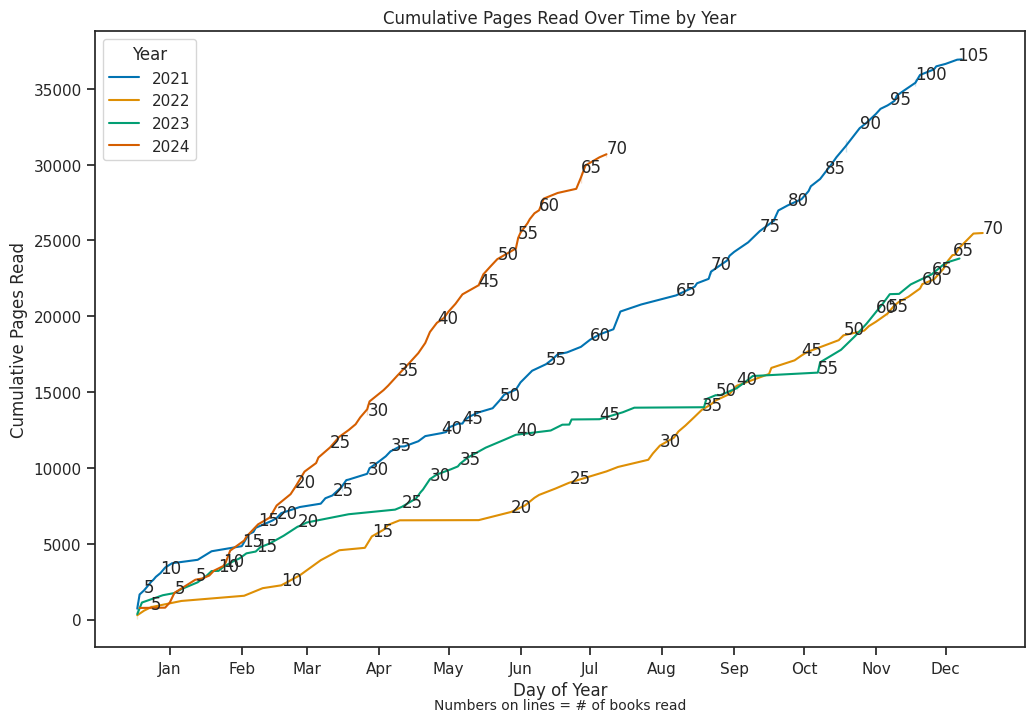

In [18]:
def analyze_and_visualize_book_data(read_bookshelf, dates=None, mod_books_parameter=5):
    """
    Analyze and visualize book reading data over time.

    This function performs the following data science tasks:
    1. Data filtering and cleaning
    2. Date parsing and manipulation
    3. Time series analysis
    4. Data aggregation and cumulative calculations
    5. Data visualization using Matplotlib and Seaborn

    Args:
    read_bookshelf (pd.DataFrame): DataFrame containing book data
    dates (list): Optional. List of two dates to filter the data [start_date, end_date]
    mod_books_parameter (int): Parameter to control frequency of book count annotations

    Returns:
    None (displays a plot)
    """

    # Data cleaning and preprocessing
    summary_by_date = read_bookshelf.loc[:, ["date_read", "title", "number_of_pages"]].dropna()
    summary_by_date['date_read'] = pd.to_datetime(summary_by_date['date_read'])

    # Data filtering based on specified dates
    if dates:
        summary_by_date = summary_by_date[summary_by_date['date_read'].between(dates[0], dates[1])]
    summary_by_date.sort_values("date_read", inplace=True)

    # Visualization setup
    plt.figure(figsize=(12, 8))

    # Time series analysis and visualization
    for year in summary_by_date['date_read'].dt.year.unique():
        # Create a copy of the filtered DataFrame to avoid SettingWithCopyWarning
        year_data = summary_by_date[summary_by_date['date_read'].dt.year == year].copy()

        # Cumulative calculations
        year_data['cumu_pages_read'] = year_data["number_of_pages"].cumsum()
        year_data['day_of_year'] = year_data['date_read'].dt.dayofyear
        year_data['cumu_books_read'] = range(1, len(year_data) + 1)

        # Plotting time series data
        sns.lineplot(x="day_of_year", y="cumu_pages_read", data=year_data, label=year)

        # Annotating plot with book count
        _ = [plt.text(row.day_of_year, row.cumu_pages_read, row.cumu_books_read)
             for index, row in year_data.iterrows() if row.cumu_books_read % mod_books_parameter == 0]

    # X-axis adjustment for better readability
    month_starts = [15, 46, 74, 105, 135, 166, 196, 227, 258, 288, 319, 349]
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(month_starts, month_names)

    # Plot styling and labeling
    plt.xlabel("Day of Year")
    plt.ylabel("Cumulative Pages Read")
    plt.title("Cumulative Pages Read Over Time by Year")
    plt.legend(title="Year")
    plt.text(x=0.5, y=-0.1, s="Numbers on lines = # of books read",
             transform=plt.gca().transAxes, ha='center', fontsize=10)

    # Display the plot
    plt.show()

# go
dates = ['2021-01-01', '2024-12-31']
analyze_and_visualize_book_data(read_bookshelf, dates)

# Review length vs rating

Perhaps the length of your reviews provides insight into your ratings of a book?

R-squared: 0.0070
Coefficient: -0.0015
Intercept: 3.9715
Shape of X: (492, 1)
Shape of Y: (492,)
Number of non-null reviews: 492
Number of unique ratings: 5


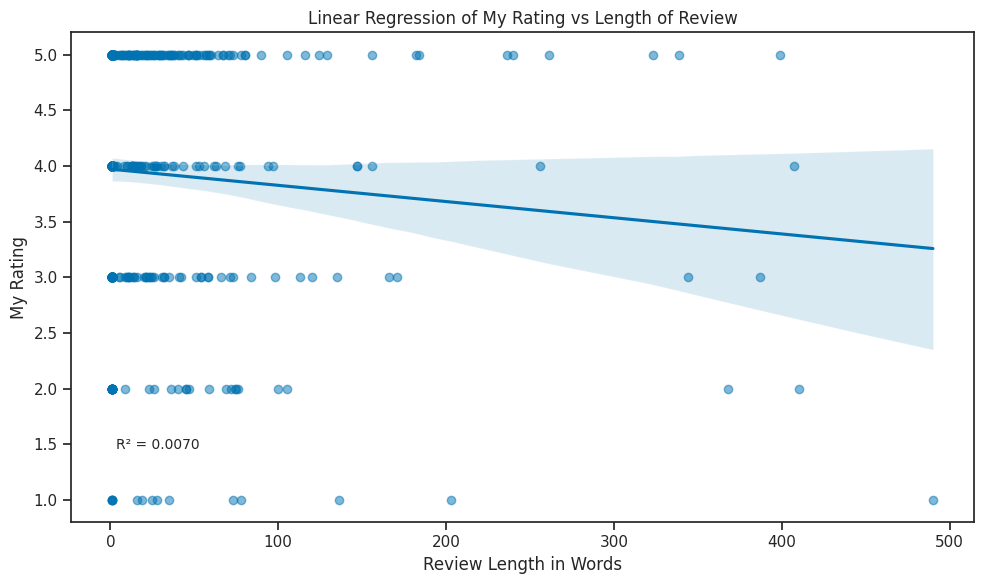

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from typing import Tuple

def prepare_data(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    """
    Prepare the data for analysis by extracting review lengths and ratings.

    Data Science Components:
    - Data type conversion
    - Feature engineering (calculating review length)
    - Data reshaping

    Args:
        df (pd.DataFrame): The input dataframe containing review and rating data.

    Returns:
        Tuple[np.ndarray, np.ndarray]: X (review lengths) and Y (ratings) arrays.
    """
    df["my_review"] = df["my_review"].astype(str)
    X = df['my_review'].apply(lambda x: len(x.split())).values.reshape(-1, 1)
    Y = df["my_rating"].values
    return X, Y

def fit_linear_regression(X: np.ndarray, Y: np.ndarray) -> Tuple[LinearRegression, float]:
    """
    Fit a linear regression model and calculate R-squared.

    Data Science Components:
    - Linear regression modeling
    - Model evaluation (R-squared calculation)

    Args:
        X (np.ndarray): Input features (review lengths).
        Y (np.ndarray): Target variable (ratings).

    Returns:
        Tuple[LinearRegression, float]: Fitted model and R-squared value.
    """
    model = LinearRegression().fit(X, Y)
    Y_pred = model.predict(X)
    r2 = r2_score(Y, Y_pred)
    return model, r2

def plot_regression(df: pd.DataFrame, r2: float):
    """
    Create a regression plot of review length vs rating.

    Data Science Components:
    - Data visualization
    - Statistical annotation

    Args:
        df (pd.DataFrame): The dataframe containing the data.
        r2 (float): The R-squared value of the linear regression.
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=df['my_review'].apply(lambda x: len(x.split())),
        y=df["my_rating"],
        data=df,
        scatter_kws={"alpha": 0.5},
    )
    plt.xlabel("Review Length in Words")
    plt.ylabel("My Rating")
    plt.title("Linear Regression of My Rating vs Length of Review")
    plt.text(0.05, 0.15, f'R² = {r2:.4f}', transform=plt.gca().transAxes, fontsize=10)
    plt.tight_layout()
    plt.show()

def analyze_review_length_vs_rating(df: pd.DataFrame):
    """
    Perform analysis of review length vs rating.

    Data Science Components:
    - Data preparation
    - Model fitting
    - Result interpretation
    - Data visualization
    - Error handling

    Args:
        df (pd.DataFrame): The input dataframe containing review and rating data.
    """
    X, Y = prepare_data(df)
    model, r2 = fit_linear_regression(X, Y)
    print(f"R-squared: {r2:.4f}")

    # Handle potential errors when accessing coefficient and intercept
    try:
        coefficient = model.coef_[0] if model.coef_.ndim > 1 else model.coef_[0]
        print(f"Coefficient: {coefficient:.4f}")
    except IndexError:
        print("Coefficient: Unable to retrieve (IndexError)")

    print(f"Intercept: {model.intercept_:.4f}")

    # Additional diagnostic information
    print(f"Shape of X: {X.shape}")
    print(f"Shape of Y: {Y.shape}")
    print(f"Number of non-null reviews: {df['my_review'].notna().sum()}")
    print(f"Number of unique ratings: {df['my_rating'].nunique()}")

    plot_regression(df, r2)

# go
review_length_vs_rating_df = read_bookshelf.copy()
analyze_review_length_vs_rating(review_length_vs_rating_df)

Using linear regression, we found an R-squared value of 0.0065, indicating that review length explains only 0.65% of the variance in ratings. Hm. This lack of correlation suggests that the effort put into writing reviews is pretty much consistent across all rating levels, demonstrating a commitment to thorough feedback regardless of personal enjoyment. That's a good thing, I'd say!

While the initial hypothesis of a connection between review length and rating was not supported, this finding opens up avenues for deeper investigation into other factors influencing ratings, such as genre preferences or author popularity.

## Review length vs rating - Polynomial Regression
Perhaps a polynomial regression would have better luck, in case the reason for the very low r2 is a non-linear relationship. Let's try and compare the two results.

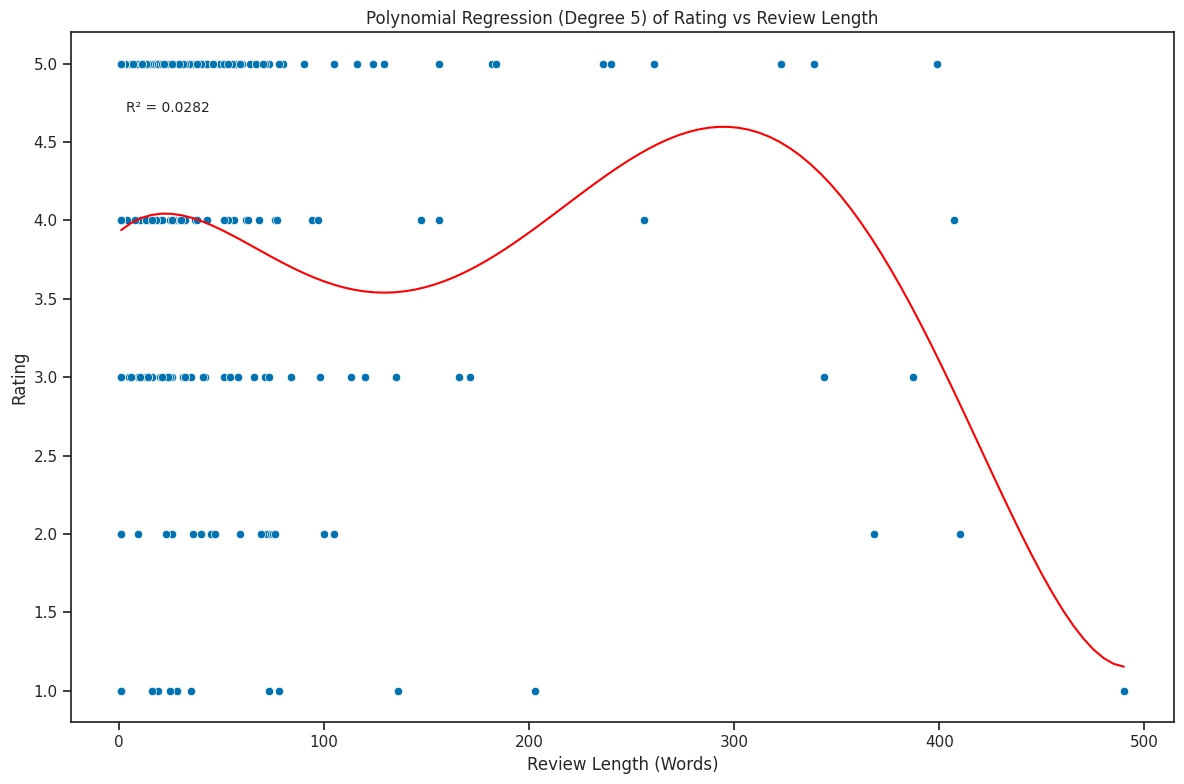

R-squared score: 0.0282
Number of reviews: 492
Average review length: 27.89 words
Median rating: 4.0


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def polynomial_regression(df, degree=5):
    """
    Perform polynomial regression on review length vs rating data.

    Data Science Components:
    - Feature engineering (calculating review length)
    - Polynomial regression modeling
    - Model evaluation (R-squared calculation)
    - Data visualization

    Args:
        df (pd.DataFrame): DataFrame containing 'my_review' and 'my_rating' columns.
        degree (int): Degree of the polynomial regression.

    Returns:
        float: R-squared score of the polynomial regression.
    """
    # Data preparation
    X = df['my_review'].apply(lambda x: len(str(x).split())).values.reshape(-1, 1)
    y = df["my_rating"].astype(int).values

    # Create and fit the polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # Generate points for plotting the curve
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    # Calculate R-squared score
    r2 = r2_score(y, model.predict(X))

    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=X.flatten(), y=y)
    plt.plot(X_plot, y_plot, color='red')

    plt.xlabel("Review Length (Words)")
    plt.ylabel("Rating")
    plt.title(f"Polynomial Regression (Degree {degree}) of Rating vs Review Length")
    plt.text(0.05, 0.9, f'R² = {r2:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    plt.tight_layout()
    plt.show()

    return r2

def analyze_review_data(df):
    """
    Perform additional analysis on the review data.

    Data Science Components:
    - Descriptive statistics
    - Data summarization

    Args:
        df (pd.DataFrame): DataFrame containing 'my_review' and 'my_rating' columns.
    """
    print(f"Number of reviews: {len(df)}")
    print(f"Average review length: {df['my_review'].apply(lambda x: len(str(x).split())).mean():.2f} words")
    print(f"Median rating: {df['my_rating'].median()}")

r2 = polynomial_regression(review_length_vs_rating_df, degree=5)
print(f"R-squared score: {r2:.4f}")

# Additional analysis
analyze_review_data(review_length_vs_rating_df)

After our initial linear regression analysis showed a very weak relationship between review length and rating, the polynomial model improved the R-squared value from 0.0065 to 0.0228, which, while still low, represents a fivefold increase in explanatory power. This improvement suggests there might be a slight non-linear relationship, but it remains weak overall. Oh well, worth a shot.

I think we can safely assume that review length doesn't correlate well with score.

# Predicted Read Time

We have a lot of information in the `to_read_bookshelf.pkl` file, but we haven't used it. Let's try and estimate - based on how long it took us to read the books we have read - how long it will take us to read the books we have yet to read.

Spoiler alert: it's not accurate, at least with my data. This is an exercise in using the tools we have learned so far, not in predicting how long it will take us to read a book.

## NN to predict read time

Regression would probably work fine, but let's try a different approach. Let's make use of another supervised learning algorithm: convolutional neural network. We'll use the `read_bookshelf.pkl` file to train the network on how long it took us to read a book, and then use the `to_read_bookshelf.pkl` file to predict how long it will take us to read the books we have yet to read.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


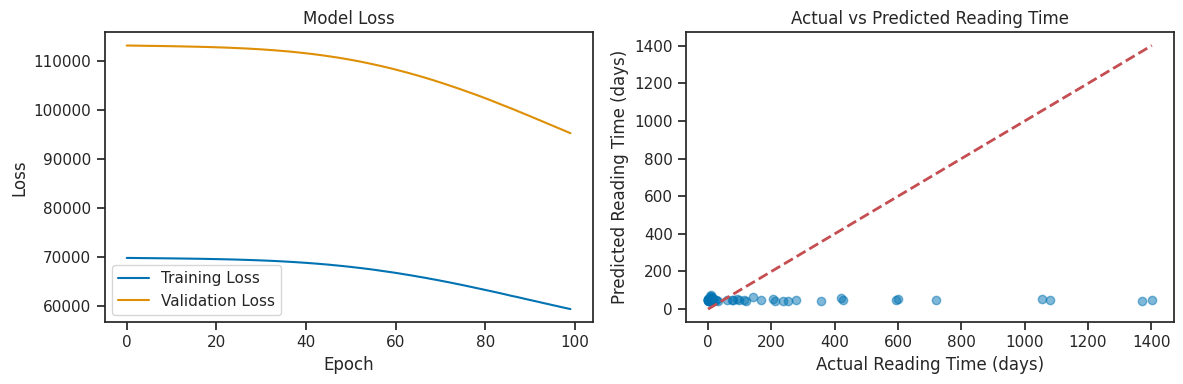

Number of books in dataset: 300
Average number of pages: 359.18
Average reading time: 153.81 days

Model Performance:
MSE: 122725.79
RMSE: 350.32
R²: -0.1446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Predicted reading time for a 300-page book: 46.75 days


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
import tensorflow as tf

def preprocess_data(df, date_range):
    """
    Preprocess the book data for analysis.

    Data Science Components:
    - Data cleaning (handling missing values)
    - Date parsing and formatting
    - Feature engineering (calculating elapsed days)

    Args:
        df (pd.DataFrame): Raw book data
        date_range (tuple): Start and end dates for filtering

    Returns:
        pd.DataFrame: Preprocessed data with 'number_of_pages' and 'elapsed_days'
    """
    df_copy = df.copy()
    df_copy['date_read'] = pd.to_datetime(df_copy['date_read'].astype(str).apply(lambda x: x.split(';')[-1].split(',')[-1]), errors='coerce')
    df_copy['date_added'] = pd.to_datetime(df_copy['date_added'], errors='coerce')
    df_copy = df_copy.dropna(subset=['date_read', 'date_added', 'number_of_pages'])
    df_copy = df_copy[df_copy['date_added'].between(*date_range)]
    df_copy['elapsed_days'] = (df_copy['date_read'] - df_copy['date_added']).dt.days.clip(lower=0)
    return df_copy[['number_of_pages', 'elapsed_days']]

def build_model(input_shape):
    """
    Build a neural network model for predicting reading time.

    Data Science Components:
    - Neural network architecture design
    - Model compilation with optimizer and loss function

    Args:
        input_shape (tuple): Shape of the input data

    Returns:
        tf.keras.Model: Compiled neural network model
    """
    model = Sequential([
        Input(shape=input_shape),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def plot_results(history, y_test, y_pred):
    """
    Plot the model's training history and predictions.

    Data Science Components:
    - Visualization of model training metrics
    - Scatter plot for actual vs predicted values

    Args:
        history (tf.keras.callbacks.History): Training history
        y_test (np.array): Actual test values
        y_pred (np.array): Predicted test values
    """
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Reading Time (days)')
    plt.ylabel('Predicted Reading Time (days)')
    plt.title('Actual vs Predicted Reading Time')

    plt.tight_layout()
    plt.show()

def analyze_reading_time(read_bookshelf, date_range):
    """
    Analyze reading time using neural networks.

    Data Science Components:
    - Data preprocessing
    - Data splitting (train/test)
    - Feature scaling
    - Model training and evaluation
    - Performance metrics calculation
    - Results visualization

    Args:
        read_bookshelf (pd.DataFrame): Raw book data
        date_range (tuple): Start and end dates for filtering
    """
    # Preprocess data
    data = preprocess_data(read_bookshelf, date_range)

    X = data['number_of_pages'].values.reshape(-1, 1)
    y = data['elapsed_days'].values

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train the model
    model = build_model((1,))
    history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test_scaled).flatten()

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot results
    plot_results(history, y_test, y_pred)

    # Print results
    print(f"Number of books in dataset: {len(data)}")
    print(f"Average number of pages: {data['number_of_pages'].mean():.2f}")
    print(f"Average reading time: {data['elapsed_days'].mean():.2f} days")
    print(f"\nModel Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {np.sqrt(mse):.2f}")
    print(f"R²: {r2:.4f}")

    example_pages = 300
    example_pages_scaled = scaler.transform([[example_pages]])
    predicted_days = model.predict(example_pages_scaled)[0][0]
    print(f"\nPredicted reading time for a {example_pages}-page book: {predicted_days:.2f} days")

date_range = pd.to_datetime(['2020-01-01', '2023-12-31'])
analyze_reading_time(read_bookshelf, date_range)

A simple neural network model has revealed some interesting results. The negative R² value indicate that book length alone is insufficient to accurately predict reading time. This is further evidenced by the high RMSE, which is nearly twice the average reading time in our dataset.
The visualization of actual versus predicted reading times shows a weak correlation, with the model's predictions clustered in a narrower range than the actual reading times. This suggests that factors beyond book length significantly influence how long it takes to read a book (which is unsurprising, if a book is dull I'm more likely to put off finishing it, if it's a pageturner I might only take hours!).

Later, we will consider multiple factors and better methods than a simple NN to deal with this.


##Books Read Per Diem

Let's use plotly to mix things up a little.

In [22]:
import plotly.express as px

def visualize_books_by_weekday(read_bookshelf):
    """
    Create a sunburst chart visualization of books read by day of the week.

    Data Science Components:
    - Data cleaning (handling missing values)
    - Data type conversion (ensuring date format)
    - Feature engineering (extracting day of week)
    - Data aggregation (counting books per weekday)
    - Data visualization (interactive sunburst chart)
    - Error handling

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book reading data
                                       with 'date_read' column

    Returns:
        plotly.graph_objs._figure.Figure: Plotly figure object
    """
    # Copy the dataframe to modify it without affecting the original
    df = read_bookshelf.copy()

    # Data cleaning: Remove rows with missing 'date_read' values
    df.dropna(subset=['date_read'], inplace=True)

    # Data type conversion: Ensure 'date_read' is in datetime format
    try:
        df['date_read'] = pd.to_datetime(df['date_read'])
    except Exception as e:
        print(f"Error converting 'date_read' to datetime: {e}")
        print("Sample of 'date_read' values:")
        print(df['date_read'].head())
        return None

    # Feature engineering: Add a column for day of week
    df['weekday'] = df['date_read'].dt.day_name()

    # Data aggregation: Count number of books read each day of the week
    weekday_count = df['weekday'].value_counts().to_dict()

    # Data manipulation: Order the days of the week chronologically
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    sorted_weekday_count = {weekday: weekday_count.get(weekday, 0) for weekday in weekdays}

    # Create a dataframe from sorted_weekday_count
    df_plot = pd.DataFrame({'Day of Week': list(sorted_weekday_count.keys()),
                            'Number of Books': list(sorted_weekday_count.values())})

    # Data visualization: Create the sunburst chart
    fig = px.sunburst(df_plot, path=['Day of Week'], values='Number of Books',
                      title='Books Read by Day of Week')

    # Customize layout and hover information
    fig.update_layout(showlegend=False,
                      hoverlabel=dict(font=dict(size=12), align='left', bgcolor='black'),
                      margin=dict(t=50, l=0, r=0, b=0))

    fig.update_traces(hovertemplate='Number of books: %{value}',
                      marker=dict(line=dict(width=2, color='DarkSlateGrey')))

    return fig

fig = visualize_books_by_weekday(read_bookshelf)
if fig is not None:
    fig.show()
else:
    print("Unable to create visualization due to data format issues.")

Well, that is less interesting than expected.

# Word Frequency of Book Titles

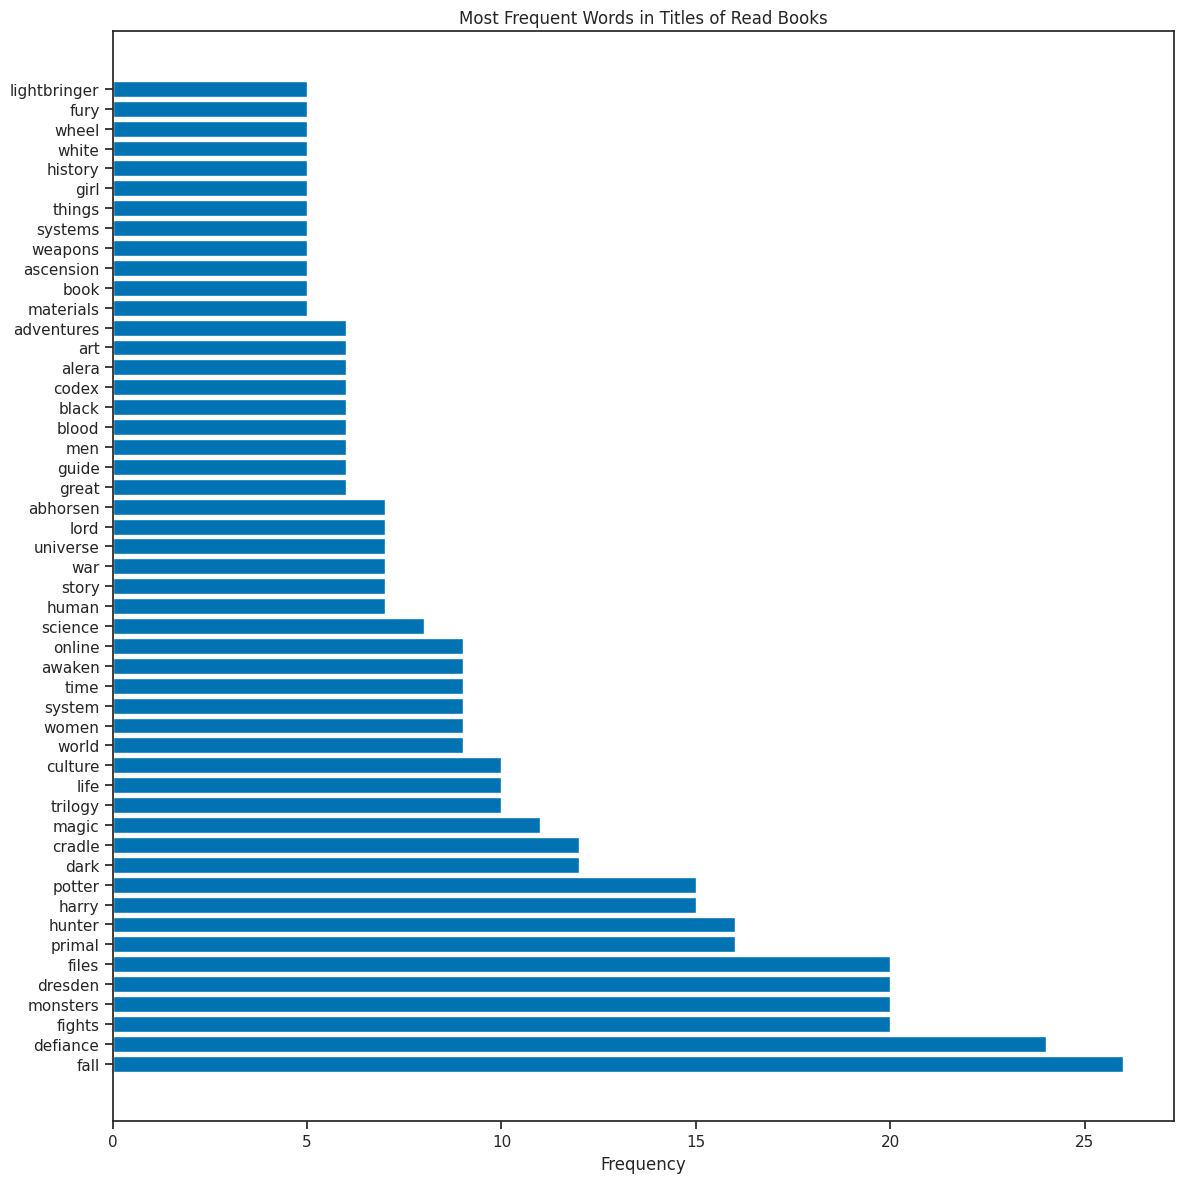

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

def analyze_title_word_frequency(read_bookshelf, top_n=50):
    """
    Analyze and visualize the frequency of words in book titles.

    Data Science Components:
    - Natural Language Processing (NLP)
    - Text preprocessing (tokenization, stopword removal)
    - Frequency analysis
    - Data visualization

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book data with 'title' column
        top_n (int): Number of top frequent words to display

    Returns:
        matplotlib.figure.Figure: Figure object containing the word frequency plot
    """
    # Download required NLTK data
    nltk.download('stopwords', quiet=True)
    nltk.download("punkt", quiet=True)

    # Get all titles
    titles = " ".join(review for review in read_bookshelf['title'])

    # Define and update stopwords
    stop_words = set(stopwords.words("english"))
    stop_words.update(['the', 'and', 'of', 'in', 'a', 'to', 'with', 'for', 'on', 'that', 'this', 'at', 'an', 'by', 'be', 'as'])

    # Text preprocessing
    # Remove stopwords from the titles
    filtered_titles = " ".join([word for word in titles.lower().split() if word not in stop_words])

    # Remove special symbols and numbers
    filtered_titles = ''.join(e for e in filtered_titles if (e.isalnum() or e.isspace()))
    word_tokens = word_tokenize(filtered_titles)
    word_tokens = [word for word in word_tokens if not word.isdigit()]

    # Frequency analysis
    word_counts = Counter([word for word in word_tokens if word not in stop_words])

    # Prepare data for visualization
    words, counts = zip(*word_counts.most_common(top_n))

    # Data visualization
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.barh(words, counts)
    ax.set_xlabel("Frequency")
    ax.set_title("Most Frequent Words in Titles of Read Books")

    plt.tight_layout()
    return fig

fig = analyze_title_word_frequency(read_bookshelf)
plt.show()

## Now as a word cloud!

Less informative, but pretty.

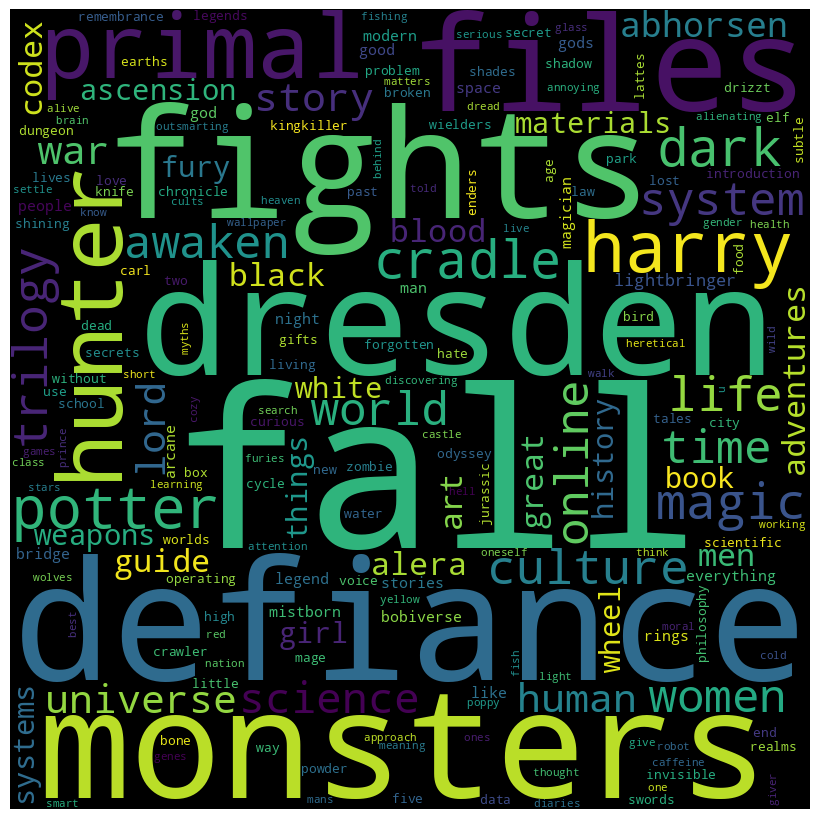

In [24]:
from collections import Counter
from wordcloud import WordCloud

def create_title_word_cloud(read_bookshelf):
    # Download required NLTK data
    nltk.download('stopwords', quiet=True)
    nltk.download("punkt", quiet=True)

    # Get all titles
    titles = " ".join(review for review in read_bookshelf['title'])

    # Define and update stopwords
    stop_words = set(stopwords.words("english"))
    stop_words.update(['the', 'and', 'of', 'in', 'a', 'to', 'with', 'for', 'on', 'that', 'this', 'at', 'an', 'by', 'be', 'as'])

    # Remove stopwords from the titles
    filtered_titles = " ".join([word for word in titles.lower().split() if word not in stop_words])

    # Remove special symbols and numbers
    filtered_titles = ''.join(e for e in filtered_titles if (e.isalnum() or e.isspace()))
    word_tokens = word_tokenize(filtered_titles)
    word_tokens = [word for word in word_tokens if not word.isdigit()]

    # Count the frequency of each word
    word_counts = Counter([word for word in word_tokens if word not in stop_words])

    # Create WordCloud object
    wordcloud = WordCloud(width=800, height=800,
                          background_color='black',
                          stopwords=stop_words,
                          min_font_size=10).generate_from_frequencies(word_counts)

    # Create figure and display word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    return plt.gcf()

word_cloud_fig = create_title_word_cloud(read_bookshelf)
word_cloud_fig.show()

# Male vs Female Authors

This is making use of existing resources. I am not claiming anything regarding gender identities, this is a hand wave-y analysis of the data available.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.7 MB/s eta 0:00:00
  Created wheel for names_dataset: filename=names_dataset-3.1.0-py3-none-any.whl size=116832758 sha256=5241a6a7a5fb0f441fd3f5fa44a6dc9f8d8613b72b0b060d376d063e25ec5c2c
  Stored in directory: /root/.cache/pip/wheels/cf/f8/43/0c4aba87b34e971e7255a41f11dc0035c5e55b026dc3480986
Successfully built names_dataset


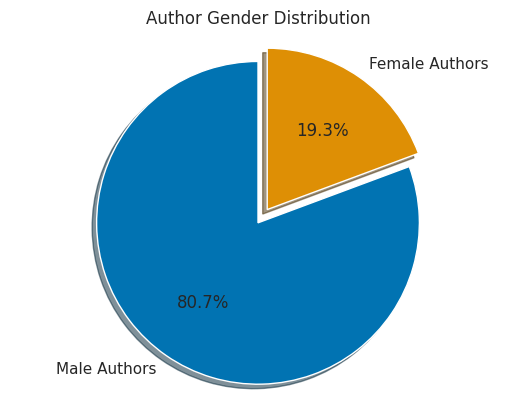

In [25]:
!pip install names_dataset
from names_dataset import NameDataset, NameWrapper

# Load the names database
nd = NameDataset()

def analyze_author_gender_distribution(read_bookshelf):
    """
    Analyze and visualize the gender distribution of book authors.

    This function performs the following tasks:
    1. Determines the gender of authors based on their first names
    2. Counts the number of male and female authors
    3. Creates a pie chart to visualize the gender distribution

    Args:
    read_bookshelf (pd.DataFrame): DataFrame containing book data with 'author' column

    Returns:
    matplotlib.figure.Figure: Figure object containing the pie chart
    """


    # Create a new column "gender" in the dataframe
    read_bookshelf_gender = read_bookshelf.copy()
    read_bookshelf_gender['gender'] = read_bookshelf['author'].apply(
        lambda x: NameWrapper(nd.search(x.split()[0])).gender if x.split()[0].isalpha() else np.nan
    )

    # Count the number of male and female authors
    male_authors = read_bookshelf_gender[read_bookshelf_gender['gender'] == 'Male'].shape[0]
    female_authors = read_bookshelf_gender[read_bookshelf_gender['gender'] == 'Female'].shape[0]

    # Plot the pie chart of male and female authors
    labels = ['Male Authors', 'Female Authors']
    sizes = [male_authors, female_authors]
    explode = (0.1, 0)  # only "explode" the 1st slice

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
           shadow=True, startangle=90)

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Author Gender Distribution')

    return fig

gender_distribution_fig = analyze_author_gender_distribution(read_bookshelf)
gender_distribution_fig.show()

This is clearly influenced by my high number of fantasy and sci fi books, which are oversatured with male writers. Let's see if I've improved the diversity of authors I've read over time...

##Gender of authors by Recent Years

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 2.6 MB/s eta 0:00:00


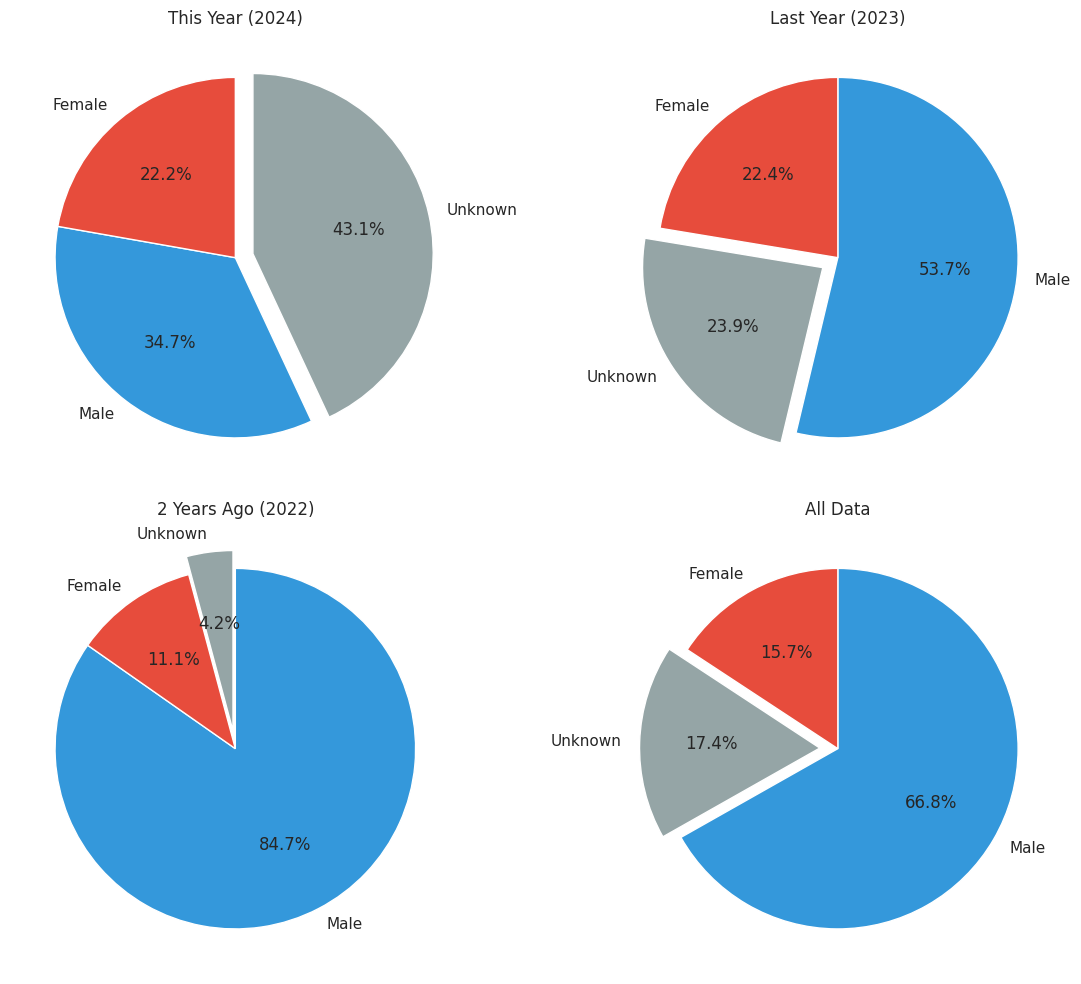

In [26]:
!pip install gender-guesser
from gender_guesser.detector import Detector

def analyze_author_gender_distribution_over_time(read_bookshelf):
    """
    Analyze and visualize the gender distribution of authors over time.

    Data Science Components:
    - Data cleaning (handling missing values)
    - Data type conversion (ensuring date format)
    - Feature engineering (extracting year, guessing gender)
    - Data aggregation (counting authors by gender and year)
    - Data visualization (pie charts)
    - Error handling

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book reading data
                                       with 'date_read' and 'author' columns

    Returns:
        matplotlib.figure.Figure: Figure object containing the pie charts
    """
    # Copy the dataframe to modify it without affecting the original
    df = read_bookshelf.copy()

    # Data cleaning: Remove rows with missing 'date_read' or 'author' values
    df.dropna(subset=['date_read', 'author'], inplace=True)

    # Data type conversion: Ensure 'date_read' is in datetime format
    try:
        df['date_read'] = pd.to_datetime(df['date_read'])
    except Exception as e:
        print(f"Error converting 'date_read' to datetime: {e}")
        print("Sample of 'date_read' values:")
        print(df['date_read'].head())
        return None

    # Get the current year, last year and 2 years ago
    CURRENT_YEAR = pd.Timestamp('now').year
    LAST_YEAR = CURRENT_YEAR - 1
    TWO_YEARS_AGO = CURRENT_YEAR - 2

    # Split the data based on the date when books were read
    current_year_books = df[df['date_read'].dt.year == CURRENT_YEAR]
    last_year_books = df[df['date_read'].dt.year == LAST_YEAR]
    two_years_ago_books = df[df['date_read'].dt.year == TWO_YEARS_AGO]

    # Initialize gender detector
    detector = Detector()

    def get_gender(author):
        first_name = author.split(" ")[0]
        gender = detector.get_gender(first_name)
        if gender in ['male', 'mostly_male']:
            return 'Male'
        elif gender in ['female', 'mostly_female']:
            return 'Female'
        else:
            return 'Unknown'

    # Get the gender of authors for different time periods
    current_year_genders = current_year_books['author'].apply(get_gender)
    last_year_genders = last_year_books['author'].apply(get_gender)
    two_years_ago_genders = two_years_ago_books['author'].apply(get_gender)
    all_genders = df['author'].apply(get_gender)

    # Define a consistent color scheme
    color_scheme = {'Male': '#3498db', 'Female': '#e74c3c', 'Unknown': '#95a5a6'}

    def plot_pie_chart(data, title, ax):
        values = data.value_counts()
        labels = values.index
        colors = [color_scheme[gender] for gender in labels]
        explode = [0.1 if label == 'Unknown' else 0 for label in labels]
        ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90,
               counterclock=False, explode=explode, colors=colors)
        ax.set_title(title)
        return ax

    # Create a subplot with 4 pie charts
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    ax[0,0] = plot_pie_chart(current_year_genders, f"This Year ({CURRENT_YEAR})", ax[0,0])
    ax[0,1] = plot_pie_chart(last_year_genders, f"Last Year ({LAST_YEAR})", ax[0,1])
    ax[1,0] = plot_pie_chart(two_years_ago_genders, f"2 Years Ago ({TWO_YEARS_AGO})", ax[1,0])
    ax[1,1] = plot_pie_chart(all_genders, "All Data", ax[1,1])

    plt.tight_layout()
    return fig

gender_distribution_fig = analyze_author_gender_distribution_over_time(read_bookshelf)
if gender_distribution_fig is not None:
    gender_distribution_fig.show()
else:
    print("Unable to create visualization due to data format issues.")

Great. It looks like, year on year, I'm reading more female authors.

# Books Over Time

## Average books read by month, year and day

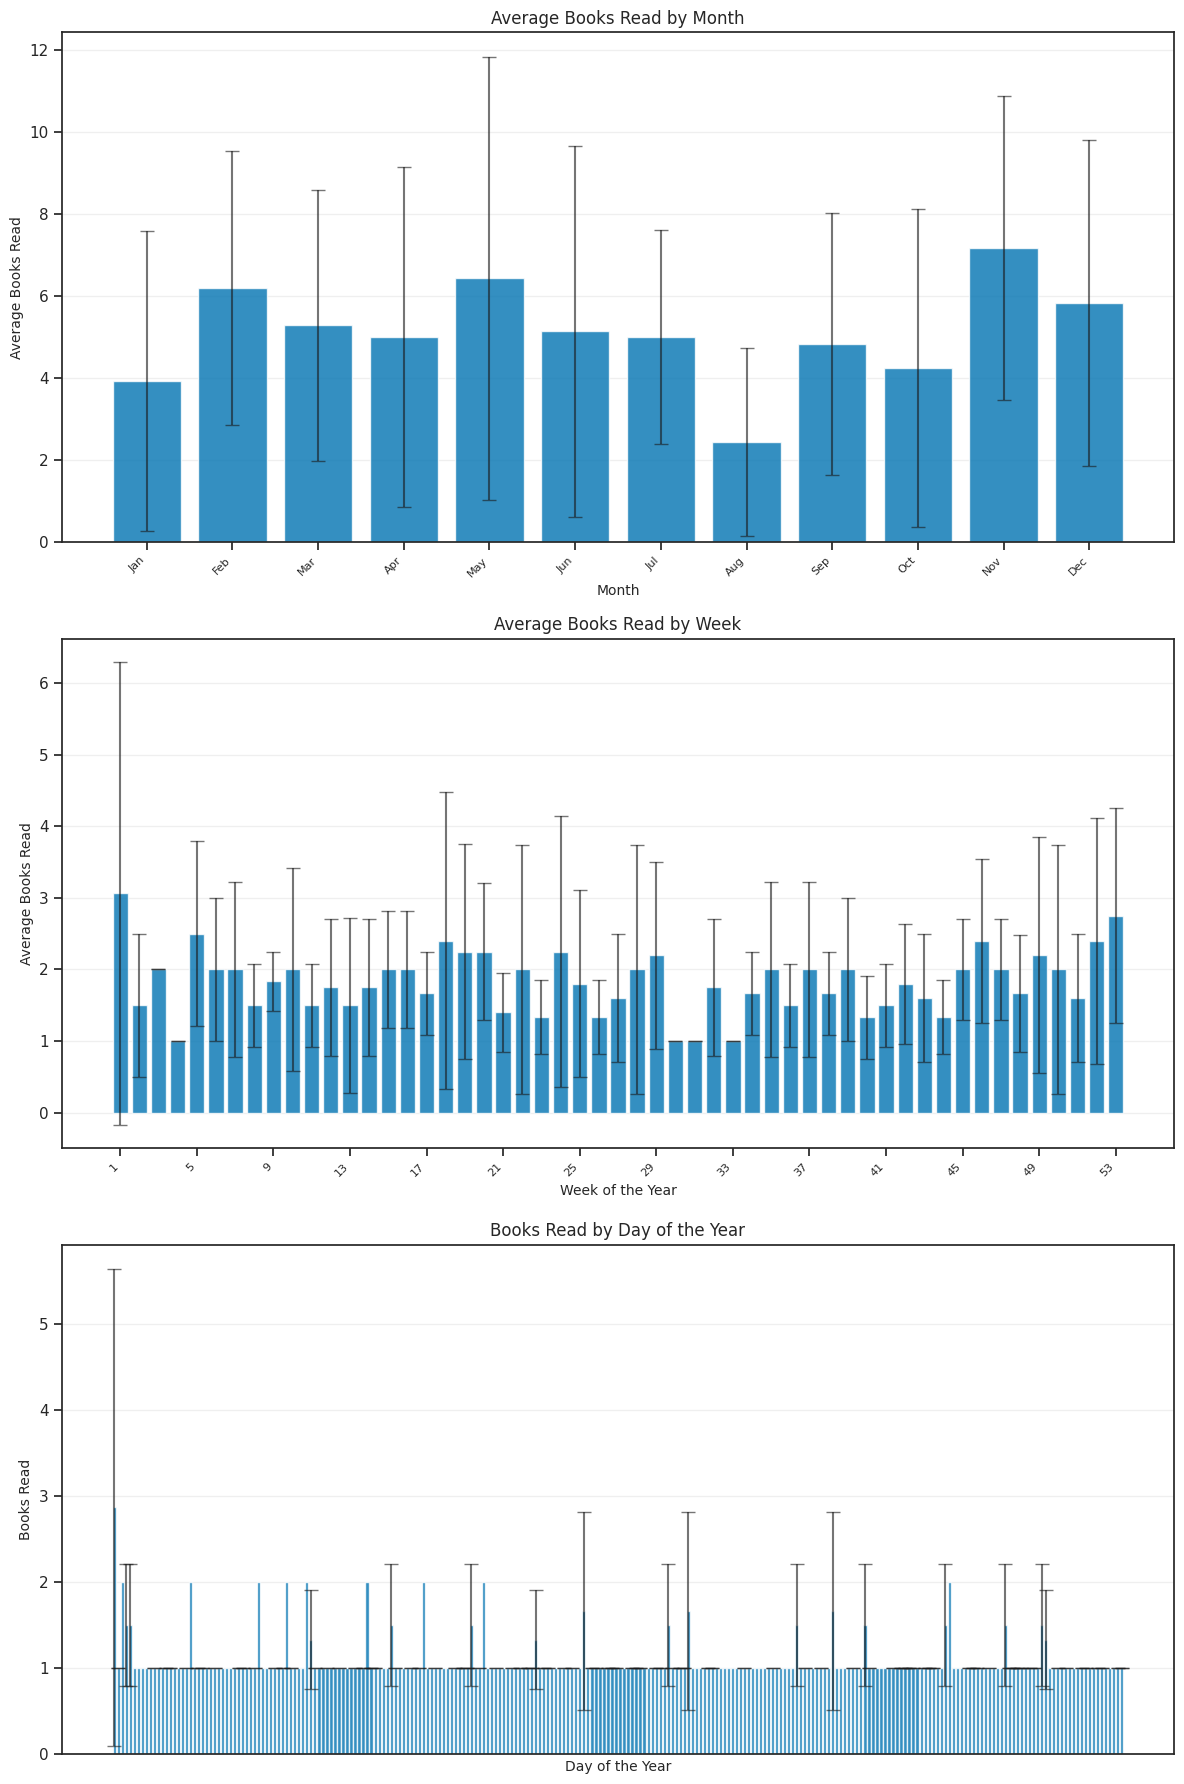

In [27]:

def analyze_reading_patterns(read_bookshelf):
    """
    Analyze and visualize reading patterns over time.

    Data Science Components:
    - Data cleaning (handling missing values)
    - Data type conversion (ensuring date format)
    - Feature engineering (extracting year, month, week, day of year)
    - Data aggregation (grouping by time periods)
    - Statistical analysis (mean and standard deviation calculations)
    - Data visualization (bar plots with error bars)
    - Error handling

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book reading data
                                       with 'date_read' column

    Returns:
        matplotlib.figure.Figure: Figure object containing the bar plots
    """
    def prepare_data(df, groupby_cols):
        grouped = df.groupby(groupby_cols).size().reset_index(name='count')
        mean = grouped.groupby(groupby_cols[0]).mean()['count']
        std = grouped.groupby(groupby_cols[0]).std()['count']
        return mean, std

    def plot_bar_with_error(ax, x, y, yerr, title, xlabel, ylabel, xticks=None, xticklabels=None):
        bars = ax.bar(x, y, alpha=0.8)
        ax.errorbar(x=x, y=y, yerr=yerr, fmt='none', color='k', capsize=5, alpha=0.6)
        ax.set_xlabel(xlabel, fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)
        ax.set_title(title, fontsize=12)
        ax.grid(axis='y', alpha=0.3)
        if xticks is not None and xticklabels is not None:
            ax.set_xticks(xticks)
            ax.set_xticklabels(xticklabels, rotation=45, ha='right', fontsize=8)
        return bars

    # Copy the dataframe to modify it without affecting the original
    df = read_bookshelf.copy()

    # Data cleaning: Remove rows with missing 'date_read' values
    df.dropna(subset=['date_read'], inplace=True)

    # Data type conversion: Ensure 'date_read' is in datetime format
    try:
        df['date_read'] = pd.to_datetime(df['date_read'])
    except Exception as e:
        print(f"Error converting 'date_read' to datetime: {e}")
        print("Sample of 'date_read' values:")
        print(df['date_read'].head())
        return None

    # Feature engineering: Extract year, month, week, and day of year
    df['year'] = df['date_read'].dt.year
    df['month'] = df['date_read'].dt.month
    df['week_number'] = df['date_read'].dt.isocalendar().week
    df['day_of_year'] = df['date_read'].dt.dayofyear

    # Create figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

    # Monthly plot
    mean_month, std_month = prepare_data(df, ['month', 'year'])
    x_month = np.arange(12)
    plot_bar_with_error(ax1, x_month, mean_month, std_month,
                        'Average Books Read by Month', 'Month', 'Average Books Read',
                        x_month, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Weekly plot
    mean_week, std_week = prepare_data(df, ['week_number', 'year'])
    x_week = np.arange(len(mean_week))
    plot_bar_with_error(ax2, x_week, mean_week, std_week,
                        'Average Books Read by Week', 'Week of the Year', 'Average Books Read',
                        x_week[::4], mean_week.index[::4])

    # Daily plot
    mean_day, std_day = prepare_data(df, ['day_of_year', 'year'])
    x_day = np.arange(len(mean_day))
    bars = plot_bar_with_error(ax3, x_day, mean_day, std_day,
                        'Books Read by Day of the Year', 'Day of the Year', 'Books Read')
    ax3.set_xticks([])

    plt.tight_layout()
    return fig

reading_patterns_fig = analyze_reading_patterns(read_bookshelf)
if reading_patterns_fig is not None:
    reading_patterns_fig.show()
else:
    print("Unable to create visualization due to data format issues.")

Huge amount of variability. The last plot is unnecessary, as it seems between 0-1 each day is the norm, with outliers on day 1 being my estimate reading years of older books.

# Heat maps of Book Ratings over Time

Let's just do 2019 onwards.

Total books read from 2019 onwards: 399
Average rating from 2019 onwards: 3.91
Years covered: 2019, 2020, 2021, 2022, 2023, 2024


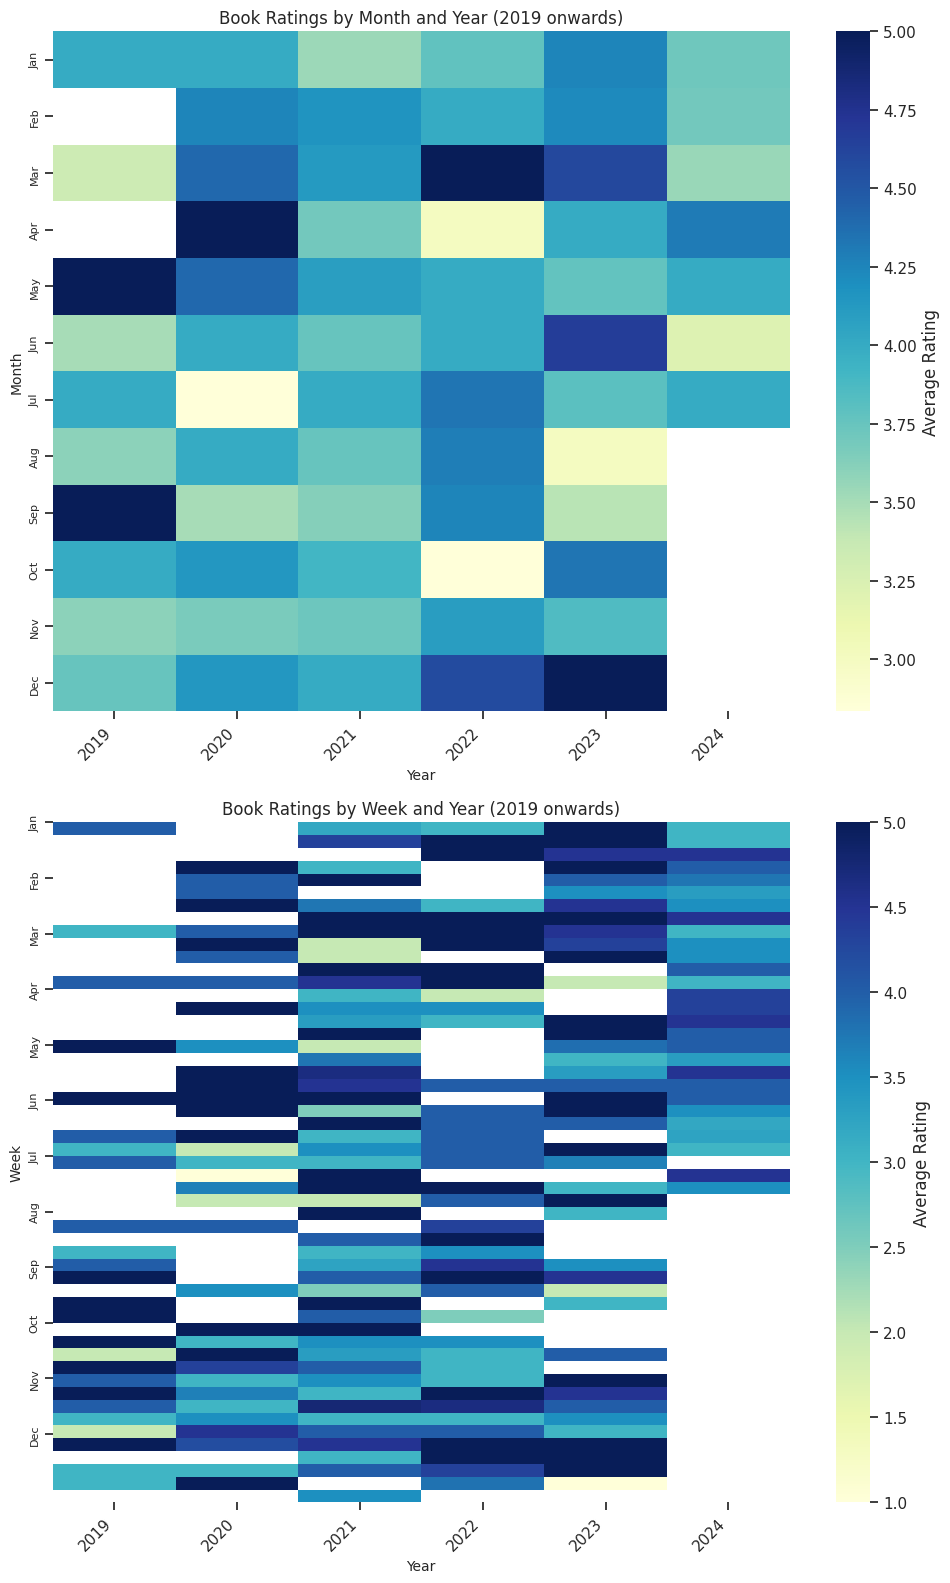

In [28]:
def analyze_book_ratings_heatmap(read_bookshelf):
    """
    Analyze and visualize book ratings over time using heatmaps, filtered from 2019 onwards.

    Data Science Components:
    - Data cleaning (handling missing values)
    - Data type conversion (ensuring date format)
    - Feature engineering (extracting year, month, week)
    - Data filtering (selecting data from 2019 onwards)
    - Data aggregation (pivot tables for heatmaps)
    - Data visualization (heatmaps)
    - Statistical analysis (total books, average rating, years covered)
    - Error handling

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book reading data
                                       with 'date_read' and 'my_rating' columns

    Returns:
        tuple: (matplotlib.figure.Figure, int, float, str)
               Figure object containing the heatmaps,
               Total number of books read,
               Average rating,
               Years covered (as a string)
    """
    def prepare_heatmap_data(df, index_col, columns_col, values_col):
        return df.pivot_table(index=index_col, columns=columns_col, values=values_col, aggfunc='mean')

    def plot_heatmap(ax, data, title, xlabel, ylabel, cmap='YlGnBu', yticklabels=None, yticks=None):
        sns.heatmap(data, ax=ax, cmap=cmap, cbar_kws={'label': 'Average Rating'})
        ax.set_title(title, fontsize=12)
        ax.set_xlabel(xlabel, fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)
        if yticklabels:
            if yticks is not None:
                ax.set_yticks(yticks)
            ax.set_yticklabels(yticklabels, fontsize=8)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Copy the dataframe to modify it without affecting the original
    df = read_bookshelf.copy()

    # Data cleaning: Remove rows with missing 'date_read' or 'my_rating' values
    df.dropna(subset=['date_read', 'my_rating'], inplace=True)

    # Data type conversion: Ensure 'date_read' is in datetime format
    try:
        df['date_read'] = pd.to_datetime(df['date_read'])
    except Exception as e:
        print(f"Error converting 'date_read' to datetime: {e}")
        print("Sample of 'date_read' values:")
        print(df['date_read'].head())
        return None, 0, 0.0, ""

    # Feature engineering: Extract year, month, and week
    df['year'] = df['date_read'].dt.year
    df['month'] = df['date_read'].dt.month
    df['week'] = df['date_read'].dt.isocalendar().week

    # Filter data from 2019 onwards
    df = df[df['year'] >= 2019]

    # Create pivot tables
    monthly_pivot = prepare_heatmap_data(df, 'month', 'year', 'my_rating')
    weekly_pivot = prepare_heatmap_data(df, 'week', 'year', 'my_rating')

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16))

    # Monthly heatmap
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plot_heatmap(ax1, monthly_pivot, 'Book Ratings by Month and Year (2019 onwards)', 'Year', 'Month', yticklabels=month_names)

    # Weekly heatmap
    month_positions = np.linspace(0, 52, num=12, endpoint=False)
    plot_heatmap(ax2, weekly_pivot, 'Book Ratings by Week and Year (2019 onwards)', 'Year', 'Week', yticklabels=month_names, yticks=month_positions)

    plt.tight_layout()

    # Calculate statistics
    total_books = len(df)
    average_rating = df['my_rating'].mean()
    years_covered = ', '.join(map(str, sorted(df['year'].unique())))

    return fig, total_books, average_rating, years_covered

ratings_heatmap_fig, total_books, average_rating, years_covered = analyze_book_ratings_heatmap(read_bookshelf)

if ratings_heatmap_fig is not None:
    ratings_heatmap_fig.show()
    print(f"Total books read from 2019 onwards: {total_books}")
    print(f"Average rating from 2019 onwards: {average_rating:.2f}")
    print(f"Years covered: {years_covered}")
else:
    print("Unable to create visualization due to data format issues.")

# Number of books read by author

Total number of unique authors: 283
Number of books by top author (Jim Butcher): 26
Number of books by 50th top author (Randall Munroe): 2


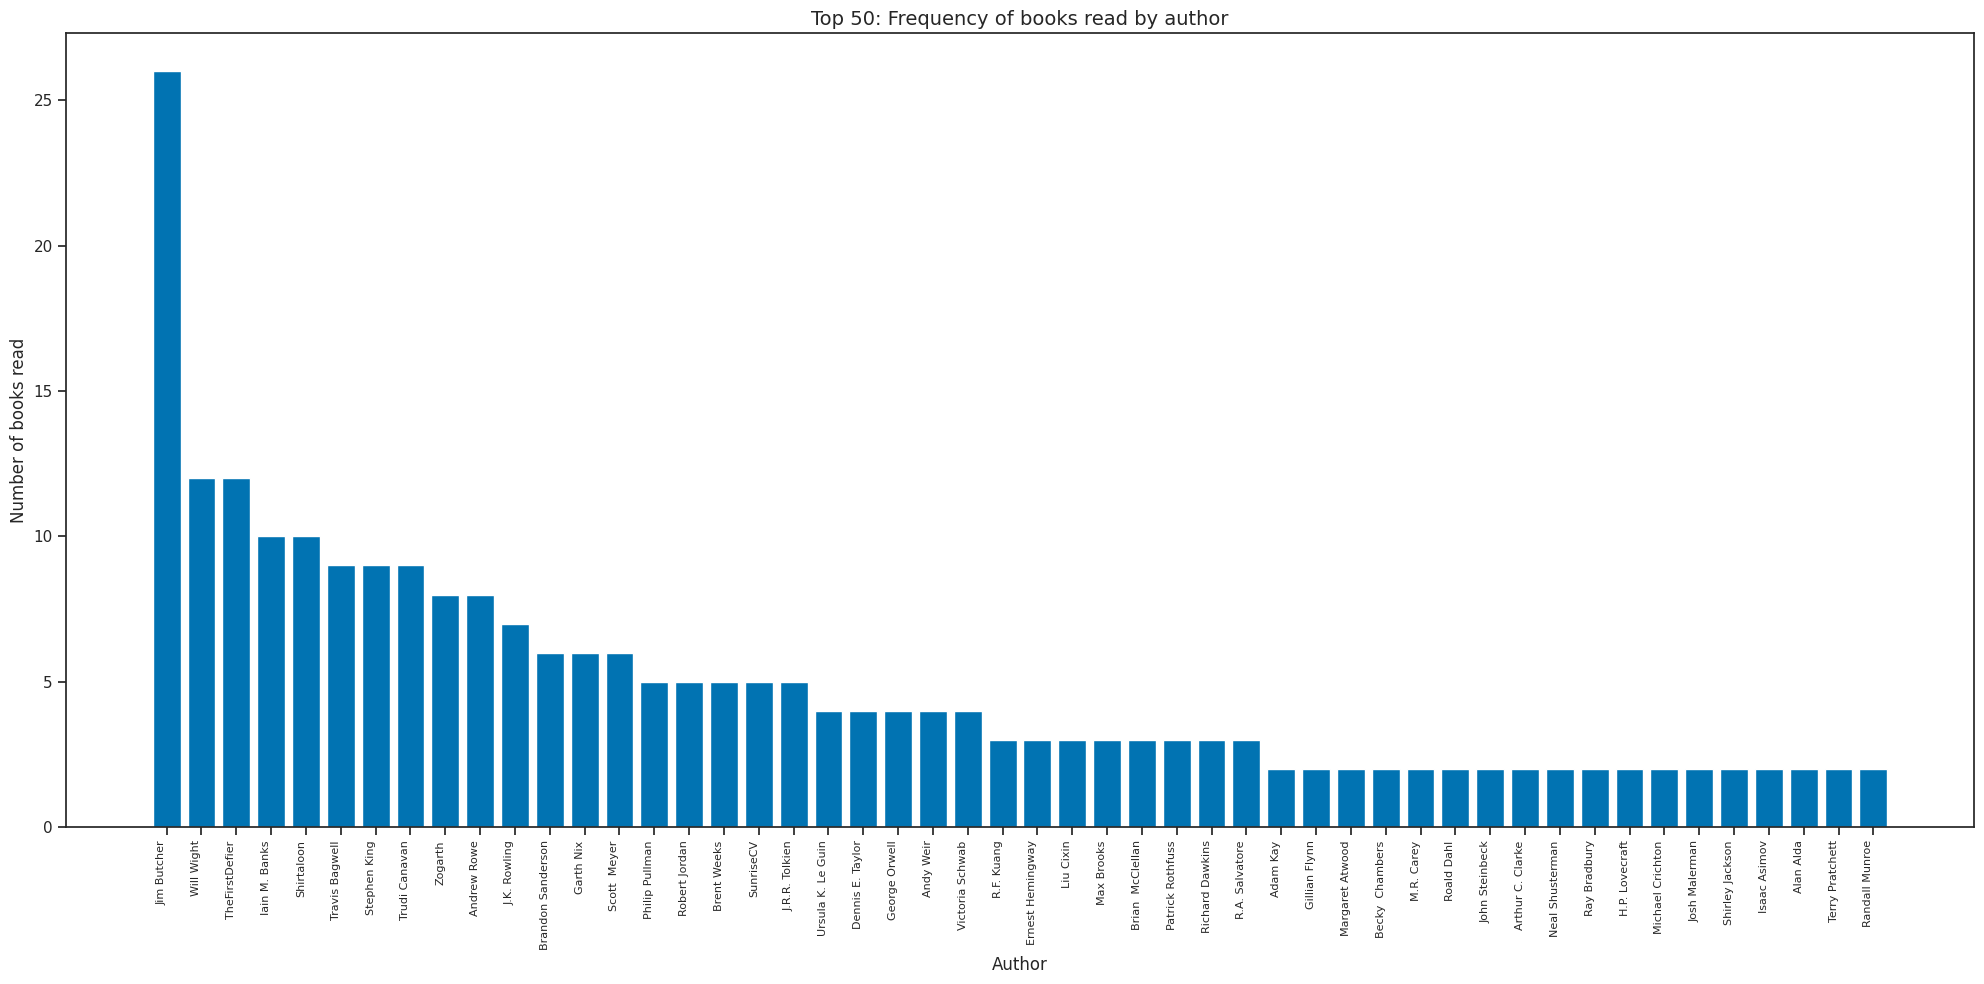

In [29]:
def analyze_top_authors(read_bookshelf, top_n=50):
    # Calculate author counts
    author_counts = read_bookshelf['author'].value_counts()
    top_authors = author_counts[:top_n]

    # Create the plot
    fig, ax = plt.subplots(figsize=(20, 10))
    bars = ax.bar(range(len(top_authors)), top_authors.values, align='center')

    # Customize the plot
    ax.set_xlabel('Author', fontsize=12)
    ax.set_ylabel('Number of books read', fontsize=12)
    ax.set_title(f'Top {top_n}: Frequency of books read by author', fontsize=14)

    # Set x-axis ticks
    ax.set_xticks(range(len(top_authors)))
    ax.set_xticklabels(top_authors.index, rotation=90, ha='right', fontsize=8)

    # Adjust layout
    plt.tight_layout()

    # Calculate statistics
    total_unique_authors = len(author_counts)
    top_author_books = top_authors.values[0]
    top_author_name = top_authors.index[0]
    last_top_author_books = top_authors.values[-1]
    last_top_author_name = top_authors.index[-1]

    return fig, total_unique_authors, top_author_name, top_author_books, last_top_author_name, last_top_author_books

# Analyze top authors
fig, total_authors, top_author, top_books, last_author, last_books = analyze_top_authors(read_bookshelf)

# Display the plot
fig.show()

# Print statistics
print(f"Total number of unique authors: {total_authors}")
print(f"Number of books by top author ({top_author}): {top_books}")
print(f"Number of books by 50th top author ({last_author}): {last_books}")

# Genres

From now on, I'm going to be making use of the genres and read dates from the enhanced CSV as described in the beginning.

First, we'll need to do some cleaning. I'm going to save the top 3 genres only, I think more than that is likely bloat.

In [30]:
def preprocess_book_genres(bookshelf):
    """
    Preprocess the genres column in the bookshelf dataframe.

    This function performs the following tasks:
    1. Removes books with NaN genres
    2. Splits the genres into separate columns (up to 3 genres per book)
    3. Cleans and standardizes genre names
    4. Removes empty genre columns
    5. Renames genre columns
    6. Drops the original 'genres' column and any excess genre columns

    Args:
    bookshelf (pd.DataFrame): DataFrame containing book information including a 'genres' column

    Returns:
    pd.DataFrame: Processed DataFrame with cleaned and separated genre columns
    """
    # Remove books with NaN genres
    bookshelf = bookshelf.dropna(subset=['genres'])

    # Split the genres column into separate entries for each book
    genre_df = bookshelf['genres'].str.split(";", expand=True)

    # Concatenate the newly created data frame with the original data frame
    bookshelf = pd.concat([bookshelf, genre_df], axis=1)

    # Clean and standardize genre names
    for i, row in bookshelf.iterrows():
        for j in range(3):
            if pd.notnull(row[j]):
                genre = row[j].split("|")[0].lower()
                genre = genre.replace("lit rpg", "litrpg")
                genre = genre.replace("sci fi", "science fiction")
                genre = genre.replace("scifi", "science fiction")
                genre = genre.replace("ya", "young adult")
                bookshelf.at[i, j] = genre

    # Remove any empty genre columns
    bookshelf.dropna(subset=[0, 1, 2], inplace=True)

    # Rename the genre columns
    bookshelf.rename(columns={0:'genre_1', 1:'genre_2', 2:'genre_3'}, inplace=True)

    # Drop the original "genres" column and any excess columns
    columns_to_drop = ['genres'] + list(range(3, genre_df.shape[1]))
    bookshelf.drop(columns=columns_to_drop, inplace=True)

    return bookshelf

# Process both read and to-read bookshelves
read_bookshelf = preprocess_book_genres(read_bookshelf)
to_read_bookshelf = preprocess_book_genres(to_read_bookshelf)

# Print some statistics about the processed data
print("Read Bookshelf:")
print(f"Number of books after preprocessing: {len(read_bookshelf)}")
print(f"Number of unique primary genres: {read_bookshelf['genre_1'].nunique()}")
print("\nTo-Read Bookshelf:")
print(f"Number of books after preprocessing: {len(to_read_bookshelf)}")
print(f"Number of unique primary genres: {to_read_bookshelf['genre_1'].nunique()}")

Read Bookshelf:
Number of books after preprocessing: 441
Number of unique primary genres: 37

To-Read Bookshelf:
Number of books after preprocessing: 640
Number of unique primary genres: 68


# Dates

The dates are a bit of a mess. Let's clean them up.

In [31]:
def split_dates(df):
    """
    Process the 'read_dates' column in the bookshelf dataframe.

    This function performs the following tasks:
    1. Splits the 'read_dates' column into a list of dates
    2. Creates new columns for start and end dates for each read
    3. Converts the dates to datetime format

    Args:
    df (pd.DataFrame): DataFrame containing book information including a 'read_dates' column

    Returns:
    pd.DataFrame: Processed DataFrame with split start and end dates for each read
    """
    # Split into a list of dates
    df['read_dates'] = df['read_dates'].str.split(';')

    # Max read count is equal to max number of books read * 2
    max_read_count = df['read_count'].max() * 2

    # Reset the index
    df = df.reset_index(drop=True)

    # For each potential book read
    for i in range(max_read_count):
        df[f'start_{i}'] = pd.NaT
        df[f'end_{i}'] = pd.NaT
        for j in range(len(df)):
            read_dates = df.at[j, 'read_dates']
            if isinstance(read_dates, float):
                continue
            if len(read_dates) <= i:
                continue
            start_date, end_date = read_dates[i].split(',')
            df.at[j, f'start_{i}'] = pd.to_datetime(start_date.strip())
            df.at[j, f'end_{i}'] = pd.to_datetime(end_date.strip())

    return df

# Process the read bookshelf
read_bookshelf = split_dates(read_bookshelf)

# Print some statistics about the processed data
print("Read Bookshelf after date processing:")
print(f"Number of books: {len(read_bookshelf)}")
print(f"Number of date columns: {sum('start' in col for col in read_bookshelf.columns)}")
print(f"Date range of first read: {read_bookshelf['start_0'].min()} to {read_bookshelf['end_0'].max()}")

Read Bookshelf after date processing:
Number of books: 441
Number of date columns: 4
Date range of first read: 2004-01-01 00:00:00 to 2024-07-21 00:00:00


# Distribution of ratings for each genre

##Distribution of ratings for each genre - Genre 1 only

Genre Statistics:
                 count      mean       std
genre_1                                   
fantasy            115  4.191304  0.926185
non fiction         73  3.972603  1.178188
fiction             45  3.866667  1.078720
science fiction     43  3.790698  1.081404
litrpg              42  3.833333  0.823931

Total number of primary genres: 37
Genre with highest average rating: study related (5.00)
Genre with lowest average rating: programming (1.00)


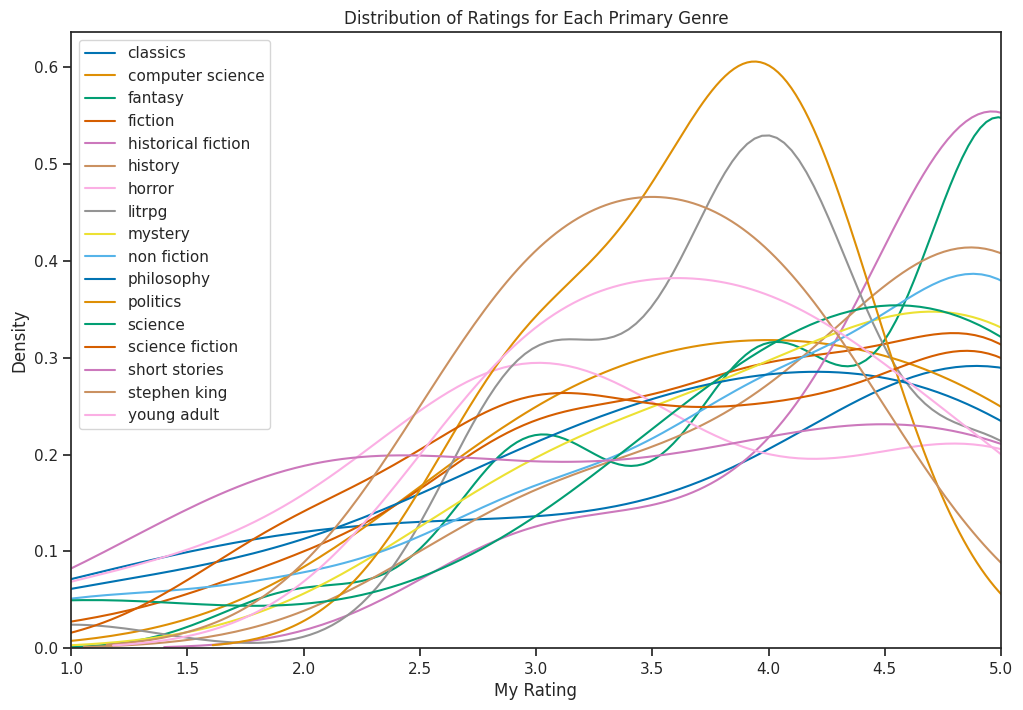

In [32]:
def plot_rating_distribution_by_genre(read_bookshelf):
    """
    Create a kernel density estimate plot of rating distributions for each primary genre.

    This function performs the following tasks:
    1. Creates a copy of the input dataframe
    2. Replaces the 'genre' column with 'genre_1' (primary genre)
    3. Groups the data by genre
    4. Plots a kernel density estimate for each genre with more than 0 variance in ratings

    Args:
    read_bookshelf (pd.DataFrame): DataFrame containing book information including 'genre_1' and 'my_rating' columns

    Returns:
    matplotlib.figure.Figure: Figure object containing the plot
    """
    # Create a copy of the original dataframe to avoid modifying it
    bookshelf_genre_1 = read_bookshelf.copy()

    # Replace the genre column with the genre_1 column
    bookshelf_genre_1['genre'] = bookshelf_genre_1['genre_1']

    # Group the dataframe by the genre column
    grouped = bookshelf_genre_1.groupby(by='genre')['my_rating']

    # Set the figure size
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot the kernel density estimate for each genre that has more than 0 variance
    for name, group in grouped:
        if group.var() > 0:
            sns.kdeplot(group, label=name, ax=ax)

    # Add x and y labels, title and legend
    ax.set_xlabel('My Rating')
    ax.set_ylabel('Density')
    ax.set_title('Distribution of Ratings for Each Primary Genre')
    ax.legend()
    ax.set_xlim(1, 5)

    return fig

# Create the plot
rating_distribution_fig = plot_rating_distribution_by_genre(read_bookshelf)

# Display the plot
rating_distribution_fig.show()

# Print some statistics about the genres and ratings
genre_stats = read_bookshelf.groupby('genre_1')['my_rating'].agg(['count', 'mean', 'std']).sort_values('count', ascending=False)
print("Genre Statistics:")
print(genre_stats.head())
print(f"\nTotal number of primary genres: {len(genre_stats)}")
print(f"Genre with highest average rating: {genre_stats['mean'].idxmax()} ({genre_stats['mean'].max():.2f})")
print(f"Genre with lowest average rating: {genre_stats['mean'].idxmin()} ({genre_stats['mean'].min():.2f})")

## Distribution of ratings for each genre - all genres

Top 10 most common genres across all genre fields:
genre
fiction            222
fantasy            172
science fiction    114
non fiction        107
litrpg              67
young adult         52
nonfiction          51
audible             42
classics            40
horror              35
Name: count, dtype: int64

Total number of unique genres: 137
Number of books with multiple genres: 441


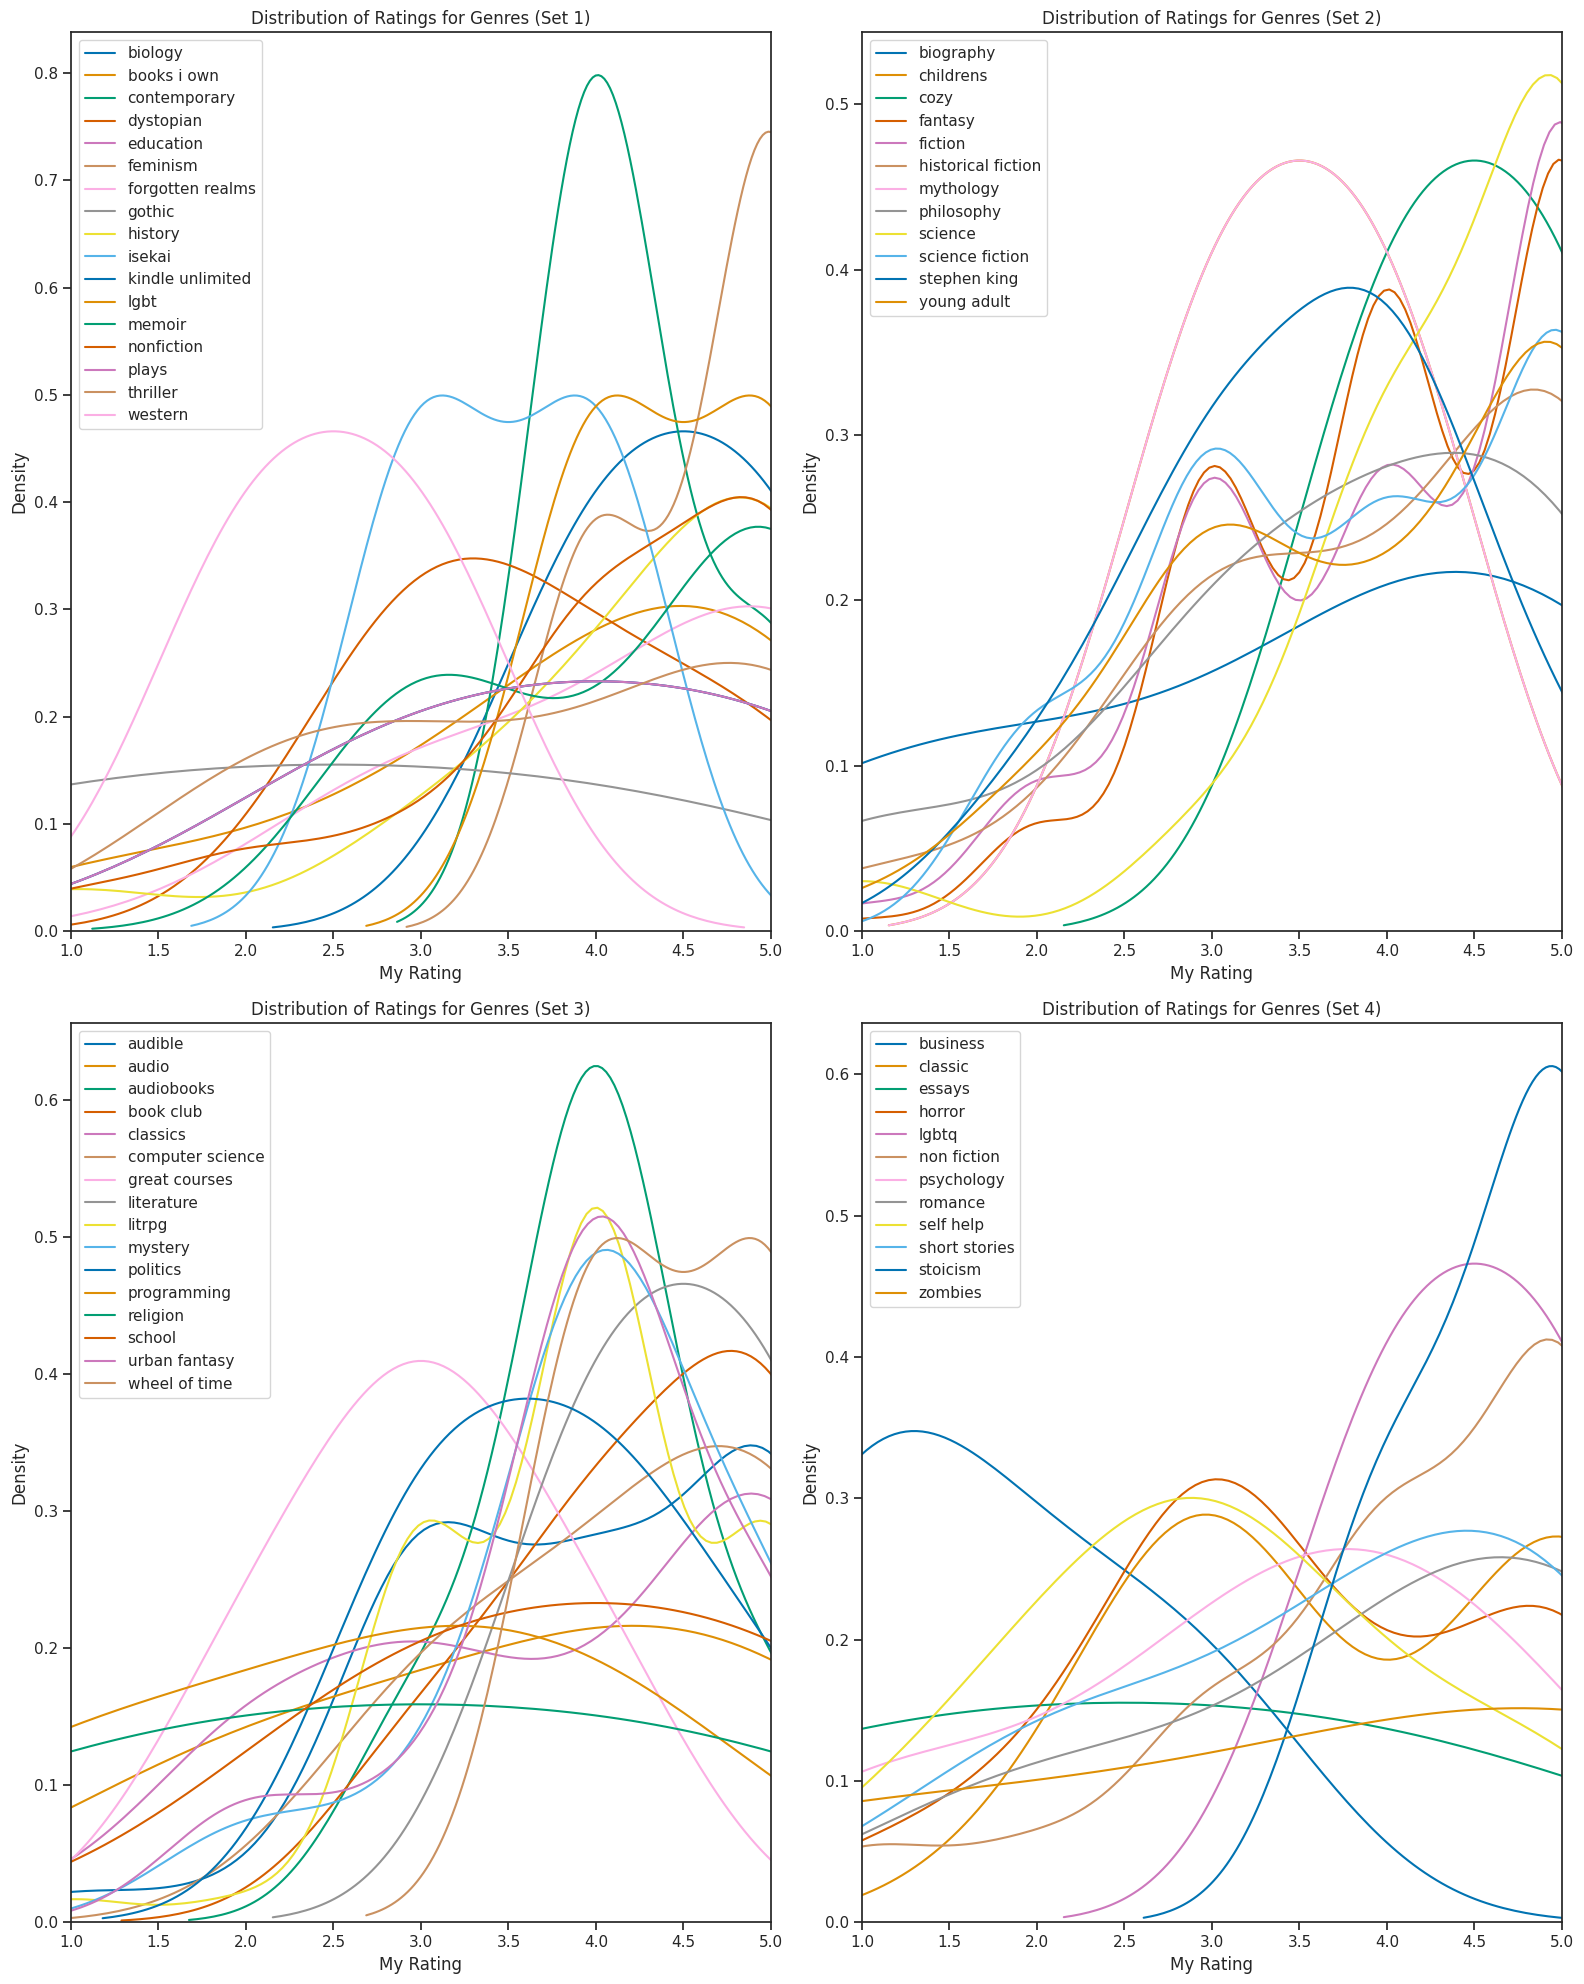

In [33]:
def plot_rating_distribution_all_genres(read_bookshelf):
    """
    Create kernel density estimate plots of rating distributions for all genres, divided into four subplots.

    This function performs the following tasks:
    1. Melts the dataframe to convert genre columns into rows
    2. Drops rows with missing genre values
    3. Divides all genres into four subsets
    4. Creates four subplots, each showing the rating distribution for a subset of genres

    Args:
    read_bookshelf (pd.DataFrame): DataFrame containing book information including 'genre_1', 'genre_2', 'genre_3', and 'my_rating' columns

    Returns:
    matplotlib.figure.Figure: Figure object containing the plots
    """
    # Create a copy of the original dataframe to avoid modifying it
    bookshelf_all_genres = read_bookshelf.copy()

    # Melt the dataframe to convert the genre_1, genre_2, and genre_3 columns into rows
    bookshelf_all_genres = bookshelf_all_genres.melt(id_vars=['my_rating'], value_vars=['genre_1', 'genre_2', 'genre_3'], var_name='genre_column', value_name='genre')

    # Drop any rows with missing genre values
    bookshelf_all_genres = bookshelf_all_genres.dropna(subset=['genre'])

    # Get the set of all genres
    all_genres = set(bookshelf_all_genres['genre'])

    # Divide the set of genres into four subsets of approximately equal size
    num_genres = len(all_genres)
    subset_size = num_genres // 4
    genre_subsets = [list(all_genres)[i:i+subset_size] for i in range(0, num_genres, subset_size)]

    # Handle the case where the number of genres is not divisible by 4
    if num_genres % 4 != 0:
        last_subset = genre_subsets.pop()  # Remove the incomplete subset
        genre_subsets[-1].extend(last_subset)  # Add the remaining genres to the last subset

    # Set the figure size
    fig, axs = plt.subplots(2, 2, figsize=(16, 20))
    axs = axs.ravel()  # Flatten the 2x2 array to make it easier to iterate over

    # Create four subplots, each with 25% of the genres
    for i, genres in enumerate(genre_subsets):
        # Create a new dataframe with only the rows for the current subset of genres
        subset_df = bookshelf_all_genres[bookshelf_all_genres['genre'].isin(genres)]
        # Group the dataframe by the genre column
        grouped = subset_df.groupby(by='genre')['my_rating']
        # Plot the kernel density estimate for each genre that has more than 0 variance
        for name, group in grouped:
            if group.var() > 0:
                sns.kdeplot(group, label=name, ax=axs[i])
        # Add x and y labels, title and legend
        axs[i].set_xlabel('My Rating')
        axs[i].set_ylabel('Density')
        axs[i].set_title(f'Distribution of Ratings for Genres (Set {i+1})')
        axs[i].legend()
        axs[i].set_xlim(1, 5)

    plt.tight_layout()
    return fig

# Create the plot
rating_distribution_all_genres_fig = plot_rating_distribution_all_genres(read_bookshelf)

# Display the plot
rating_distribution_all_genres_fig.show()

# Print some statistics about the genres
genre_counts = read_bookshelf[['genre_1', 'genre_2', 'genre_3']].melt(value_name='genre')['genre'].value_counts()
print("Top 10 most common genres across all genre fields:")
print(genre_counts.head(10))
print(f"\nTotal number of unique genres: {len(genre_counts)}")
print(f"Number of books with multiple genres: {sum(read_bookshelf['genre_2'].notna())}")

That's rather ugly. Let's just look at the top 5 genres.

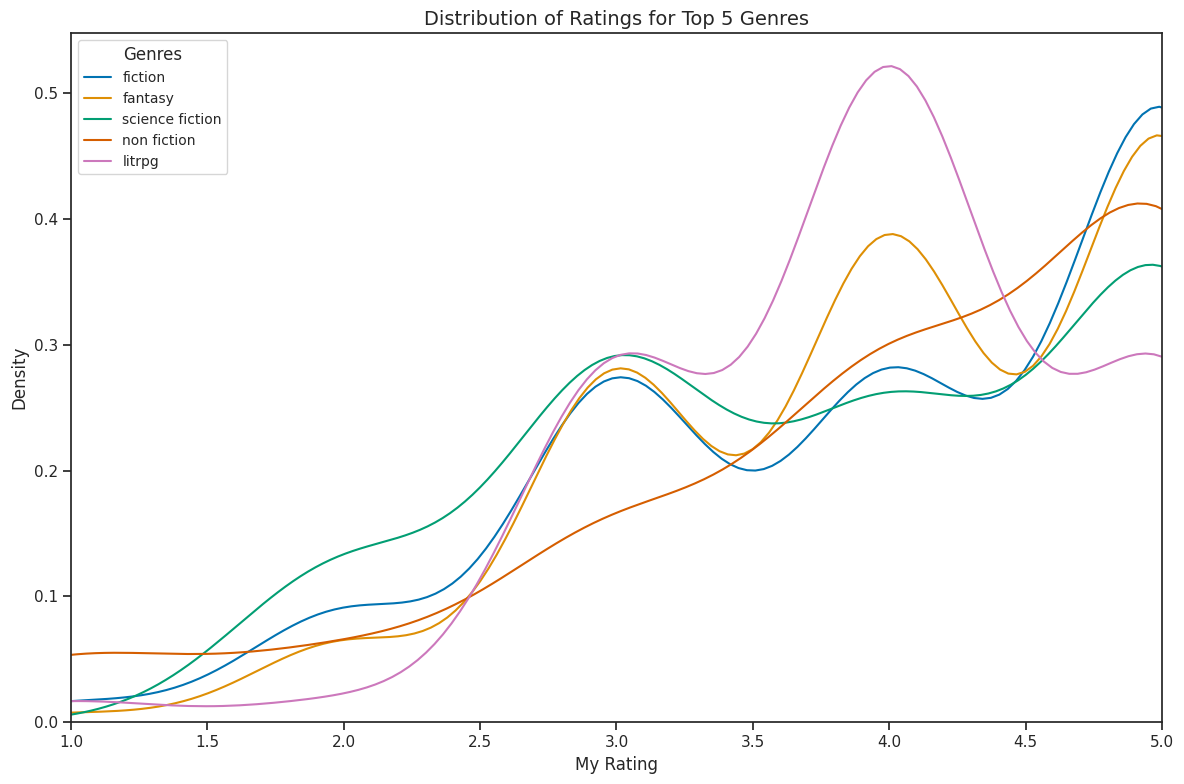

Top 5 Genres:
fiction:
  Number of books: 222
  Average rating: 4.00
  Most common rating: 5

fantasy:
  Number of books: 172
  Average rating: 4.03
  Most common rating: 5

science fiction:
  Number of books: 114
  Average rating: 3.83
  Most common rating: 5

non fiction:
  Number of books: 107
  Average rating: 4.00
  Most common rating: 5

litrpg:
  Number of books: 67
  Average rating: 3.93
  Most common rating: 4



In [34]:
def prepare_genre_data(df):
    """
    Prepare the genre data by melting the genre columns and dropping missing values.

    Args:
    df (pd.DataFrame): DataFrame containing book information including genre columns and ratings

    Returns:
    pd.DataFrame: Melted DataFrame with genre and rating information
    """
    # Melt the dataframe to convert the genre columns into rows
    melted_df = df.melt(id_vars=['my_rating'], value_vars=['genre_1', 'genre_2', 'genre_3'], var_name='genre_column', value_name='genre')

    # Drop any rows with missing genre values
    melted_df = melted_df.dropna(subset=['genre'])

    return melted_df

def plot_top_genres(df, num_genres=5):
    """
    Plot the rating distribution for the top genres and print statistics.

    Args:
    df (pd.DataFrame): Melted DataFrame with genre and rating information
    num_genres (int): Number of top genres to analyze (default is 5)

    Returns:
    None
    """
    # Get the top genres
    top_genres = df['genre'].value_counts().nlargest(num_genres).index

    # Filter the dataframe to include only the top genres
    top_genres_df = df[df['genre'].isin(top_genres)]

    # Set up the plot
    plt.figure(figsize=(12, 8))

    # Plot the kernel density estimate for each top genre
    for i, genre in enumerate(top_genres):
        genre_data = top_genres_df[top_genres_df['genre'] == genre]['my_rating']
        if genre_data.var() > 0:
            sns.kdeplot(genre_data, label=genre)

    # Customize the plot
    plt.xlabel('My Rating', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Distribution of Ratings for Top {num_genres} Genres', fontsize=14)
    plt.legend(title='Genres', title_fontsize='12', fontsize='10')
    plt.xlim(1, 5)

    plt.tight_layout()
    plt.show()

    # Print some statistics
    print(f"Top {num_genres} Genres:")
    for genre in top_genres:
        genre_data = top_genres_df[top_genres_df['genre'] == genre]['my_rating']
        print(f"{genre}:")
        print(f"  Number of books: {len(genre_data)}")
        print(f"  Average rating: {genre_data.mean():.2f}")
        print(f"  Most common rating: {genre_data.mode().values[0]}")
        print()

# prep data
bookshelf_all_genres = prepare_genre_data(read_bookshelf)

# Plot the top 5 genres
plot_top_genres(bookshelf_all_genres)

# Number of books / pages read by genre

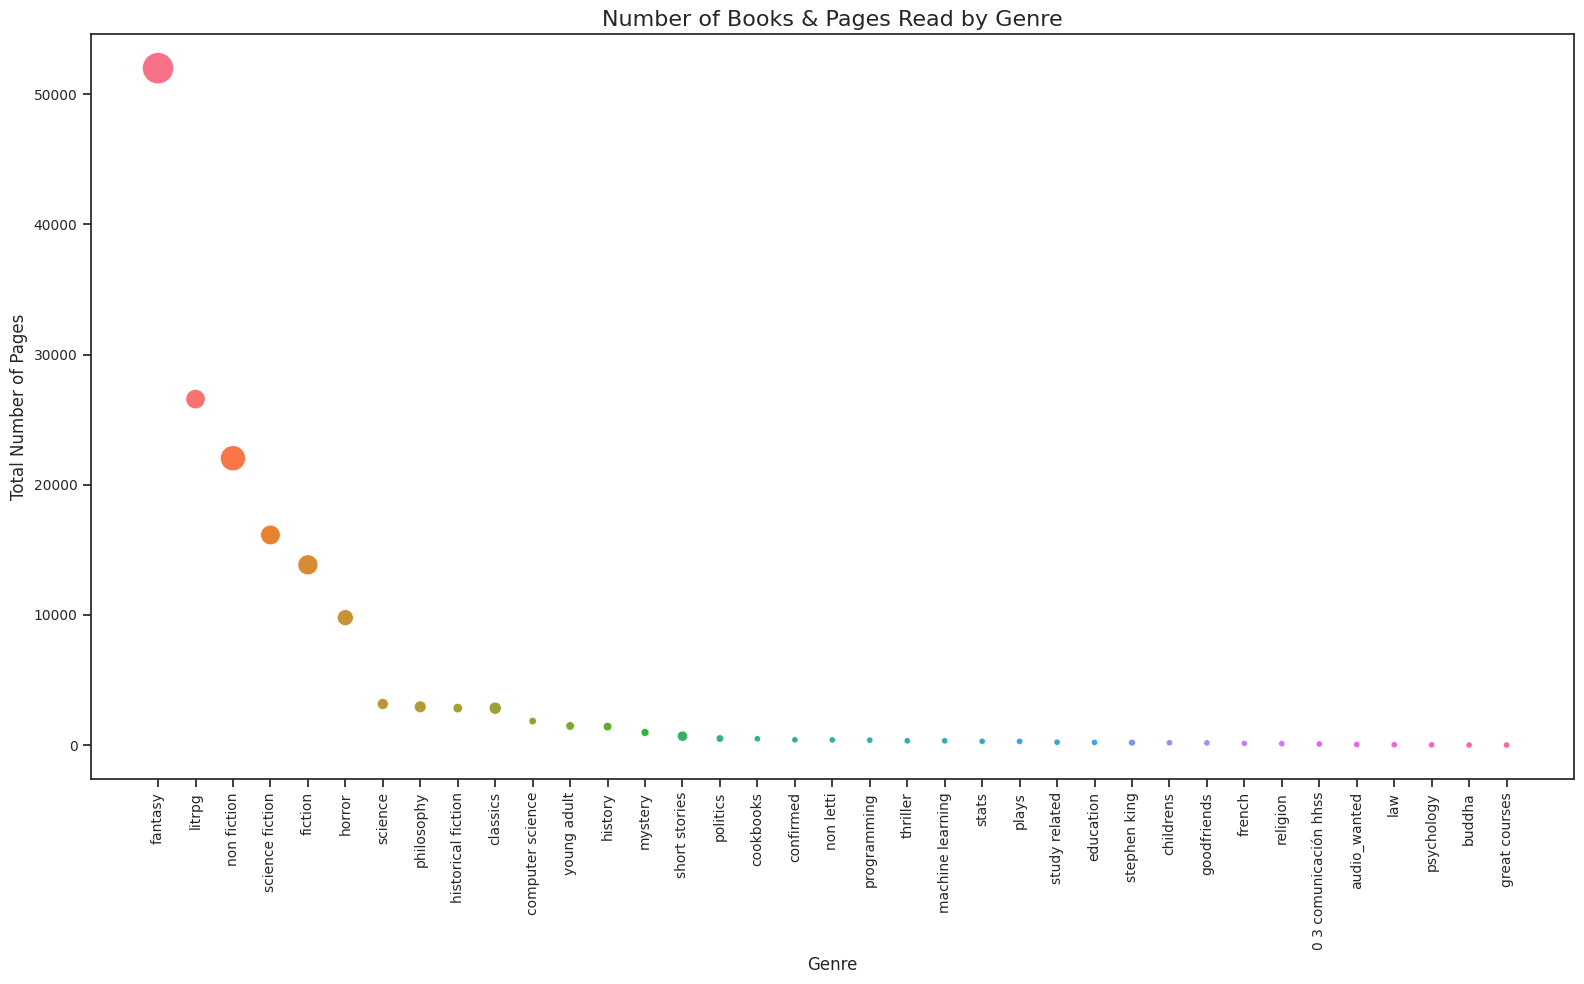


Top 5 Genres Analysis:

fantasy:
  Number of books: 115
  Total pages: 51995.0
  Average rating: 4.19
  Average pages per book: 452
  Most read author: Jim Butcher
  Year with most fantasy books: 2021.0

litrpg:
  Number of books: 42
  Total pages: 26571.0
  Average rating: 3.83
  Average pages per book: 633
  Most read author: Shirtaloon
  Year with most litrpg books: 2024

non fiction:
  Number of books: 73
  Total pages: 22030.0
  Average rating: 3.97
  Average pages per book: 306
  Most read author: Adam Kay
  Year with most non fiction books: 2023.0

science fiction:
  Number of books: 43
  Total pages: 16139.0
  Average rating: 3.79
  Average pages per book: 375
  Most read author: Iain M. Banks
  Year with most science fiction books: 2020.0

fiction:
  Number of books: 45
  Total pages: 13843.0
  Average rating: 3.87
  Average pages per book: 308
  Most read author: Iain Banks
  Year with most fiction books: 2021


In [35]:
def analyze_genres(df):
    """
    Analyze genres by aggregating book count, total pages, and average rating.

    Args:
    df (pd.DataFrame): DataFrame containing book information

    Returns:
    pd.DataFrame: Aggregated data by genre
    """
    book_count = df["genre_1"].value_counts().reset_index()
    book_count.columns = ["genre_1", "count"]

    grouped_by_genre = df.groupby("genre_1").agg({
        "number_of_pages": "sum",
        "my_rating": "mean"
    }).reset_index()
    grouped_by_genre = grouped_by_genre.merge(book_count, on="genre_1")
    grouped_by_genre = grouped_by_genre.sort_values("number_of_pages", ascending=False)

    return grouped_by_genre

def plot_genre_analysis(grouped_data):
    """
    Plot genre analysis as a scatter plot of pages read vs genre, without number labels.

    Args:
    grouped_data (pd.DataFrame): Aggregated genre data

    Returns:
    pd.DataFrame: Top 5 genres by number of pages
    """
    plt.figure(figsize=(16, 10))

    scatter = sns.scatterplot(x="genre_1", y="number_of_pages", data=grouped_data, hue="genre_1", size="count",
                    sizes=(20, 500), legend=False)

    plt.title("Number of Books & Pages Read by Genre", fontsize=16)
    plt.xlabel("Genre", fontsize=12)
    plt.ylabel("Total Number of Pages", fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

    return grouped_data.head()

def print_top_genres_info(top_genres, df):
    """
    Print detailed information about the top genres.

    Args:
    top_genres (pd.DataFrame): Top genres data
    df (pd.DataFrame): Original DataFrame containing book information
    """
    # Convert 'date_read' to datetime if it's not already
    try:
        df['date_read'] = pd.to_datetime(df['date_read'])
    except Exception as e:
        print(f"Error converting 'date_read' to datetime: {e}")
        print("Sample of 'date_read' values:")
        print(df['date_read'].head())
        return

    print("\nTop 5 Genres Analysis:")
    for _, row in top_genres.iterrows():
        genre = row['genre_1']
        print(f"\n{genre}:")
        print(f"  Number of books: {row['count']}")
        print(f"  Total pages: {row['number_of_pages']}")
        print(f"  Average rating: {row['my_rating']:.2f}")

        genre_books = df[df['genre_1'] == genre]
        print(f"  Average pages per book: {genre_books['number_of_pages'].mean():.0f}")
        print(f"  Most read author: {genre_books['author'].mode().values[0]}")

        # Check if 'date_read' column exists and has valid data
        if 'date_read' in genre_books.columns and not genre_books['date_read'].isna().all():
            print(f"  Year with most {genre} books: {genre_books['date_read'].dt.year.mode().values[0]}")
        else:
            print(f"  Year with most {genre} books: Data not available")

# Analyze genres
grouped_by_genre = analyze_genres(read_bookshelf)

# Plot and get top 5 genres
top_5_genres = plot_genre_analysis(grouped_by_genre)

# Print top genres info
print_top_genres_info(top_5_genres, read_bookshelf)

# Number of Books Read by Year Published and Genre

## \# of Books Read By Year Published & Genre, all data


Top 10 Genres Since 1990:
genre
fiction            213
fantasy            172
science fiction    111
non fiction        105
litrpg              67
young adult         52
nonfiction          50
audible             41
classics            38
horror              31
Name: count, dtype: int64

Percentage of books in top 10 genres (since 1990): 205.13%


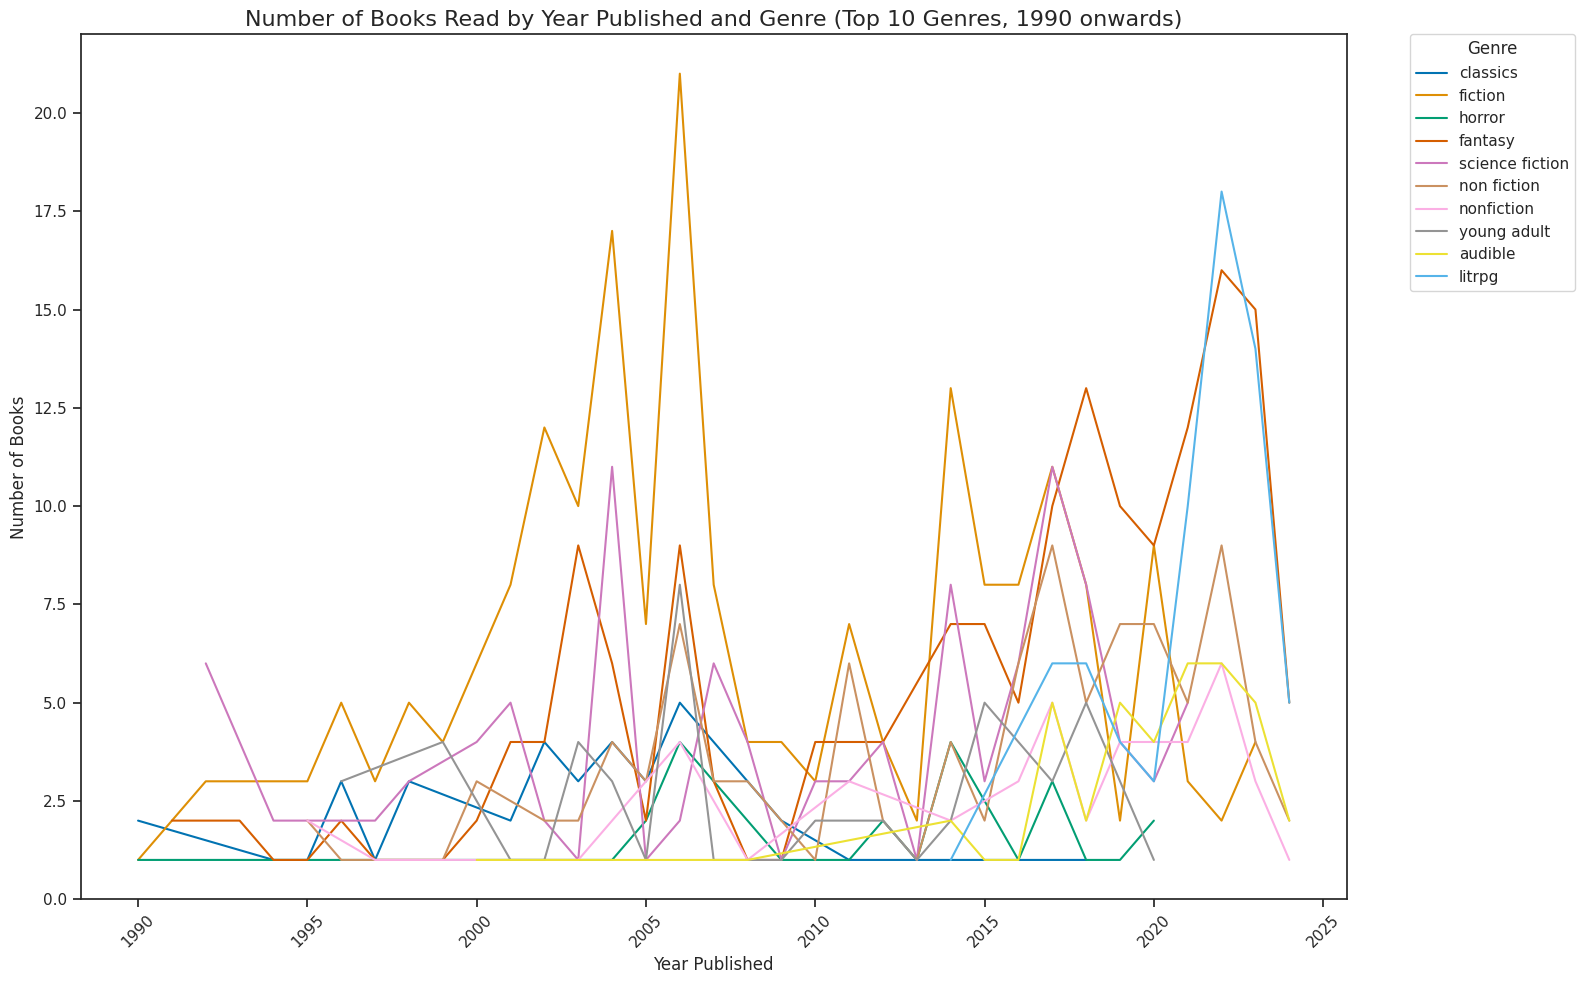

In [36]:
def count_genres(read_bookshelf):
    """
    Counts the occurrences of each genre in the provided DataFrame.

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book information including genres.

    Returns:
        pd.DataFrame: A DataFrame with one row for each unique genre and a 'count' column
            indicating the number of books in that genre.
    """
    # Identify genre columns
    genre_columns = [col for col in read_bookshelf.columns if col.startswith('genre')]

    if not genre_columns:
        raise ValueError("No genre columns found in the DataFrame")

    # Melt the DataFrame to create a row for each genre
    melted_df = pd.melt(read_bookshelf, id_vars=['year_published'], value_vars=genre_columns, var_name='genre_column', value_name='genre')

    # Remove rows where genre is NaN or empty string
    melted_df = melted_df[melted_df['genre'].notna() & (melted_df['genre'] != '')]

    # Count the occurrences of each genre
    genre_counts = melted_df.groupby(['year_published', 'genre']).size().reset_index(name='count')

    return genre_counts

def analyze_top_genres_since_1990(read_bookshelf, start_year=1990):
    """
    Analyze and visualize the number of books read for the top 10 genres from 1990 onwards.

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book information including genres and publication year
        start_year (int): The starting year for the analysis (default is 1990)

    Returns:
        matplotlib.figure.Figure: Figure object containing the plot
        pd.Series: Top 10 genres and their total counts since 1990
    """
    try:
        # Use the improved count_genres function
        genre_counts = count_genres(read_bookshelf)

        # Filter data for years after start_year
        book_count_filtered = genre_counts[genre_counts["year_published"] >= start_year]

        # Get the top 10 genres by count
        top_10_genres = book_count_filtered.groupby("genre")["count"].sum().sort_values(ascending=False).head(10)

        # Filter data to include only top 10 genres
        book_count_filtered = book_count_filtered[book_count_filtered["genre"].isin(top_10_genres.index)]

        # Create the plot
        fig, ax = plt.subplots(figsize=(16, 10))

        # Create the line plot
        sns.lineplot(x="year_published", y="count", hue="genre", data=book_count_filtered, ax=ax)

        # Add title and axis labels
        ax.set_title(f"Number of Books Read by Year Published and Genre (Top 10 Genres, {start_year} onwards)", fontsize=16)
        ax.set_xlabel("Year Published", fontsize=12)
        ax.set_ylabel("Number of Books", fontsize=12)

        # Improve readability
        plt.xticks(rotation=45)
        plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.tight_layout()

        return fig, top_10_genres

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None, None

# Analyze and plot the data
top_genres_fig, top_10_genres = analyze_top_genres_since_1990(read_bookshelf)

# Display the plot
if top_genres_fig:
    top_genres_fig.show()

# Print the top 10 genres and their counts
if top_10_genres is not None:
    print("\nTop 10 Genres Since 1990:")
    print(top_10_genres)

    # Calculate and print the percentage of books in the top 10 genres (for books since 1990)
    total_books_since_1990 = read_bookshelf[read_bookshelf["year_published"] >= 1990].shape[0]
    top_10_books = top_10_genres.sum()
    percentage_top_10 = (top_10_books / total_books_since_1990) * 100

    print(f"\nPercentage of books in top 10 genres (since 1990): {percentage_top_10:.2f}%")
else:
    print("Unable to analyze top genres due to an error.")

In [37]:
print(genre_counts)

genre
fiction            222
fantasy            172
science fiction    114
non fiction        107
litrpg              67
                  ... 
china                1
magical realism      1
cooking              1
teaching             1
cs                   1
Name: count, Length: 137, dtype: int64


# Predicting Rating for to_read_bookshelf

To do this, we'll build a simple feed-foward NN using PyTorch and train it on the read_bookshelf data, specifically the my_rating, average_rating and genre_1 columns, in order to predict the future my_rating for the books I haven't read yet.


Early stopping triggered at epoch 32


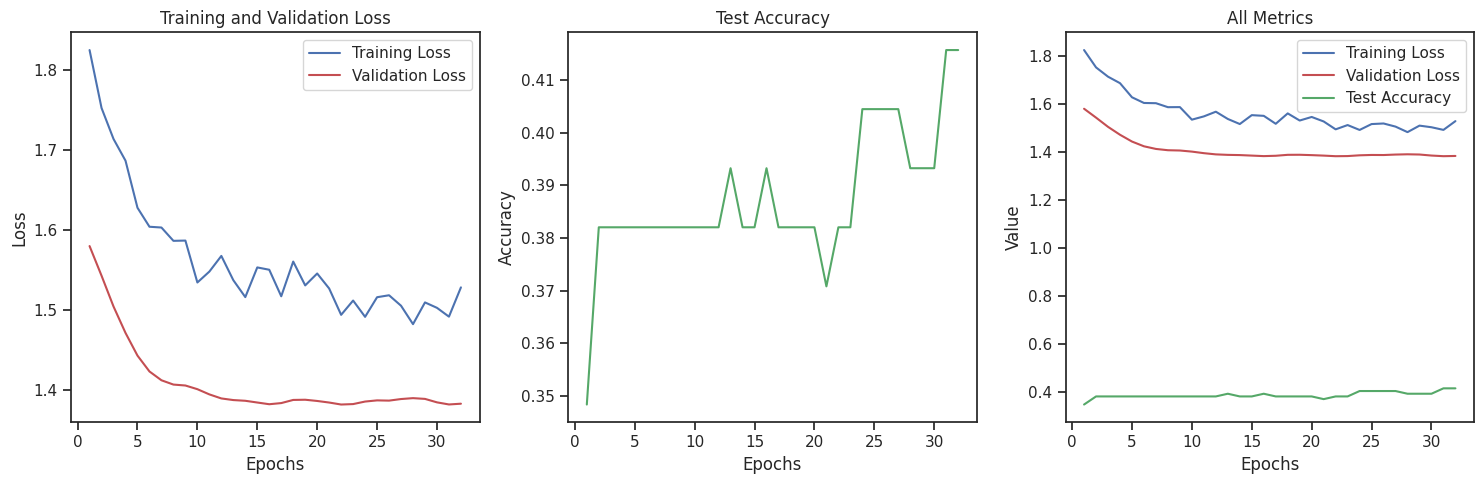

Final Test Accuracy: 0.4157


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

class RatingPredictor(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, dropout_rate=0.5):
        super().__init__()
        layers = []
        for i, hidden_size in enumerate(hidden_sizes):
            if i == 0:
                layers.append(nn.Linear(input_size, hidden_size))
            else:
                layers.append(nn.Linear(hidden_sizes[i-1], hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
        self.hidden_layers = nn.Sequential(*layers)
        self.output_layer = nn.Linear(hidden_sizes[-1], num_classes)

    def forward(self, x):
        x = self.hidden_layers(x)
        x = self.output_layer(x)
        return x

def train_rating_predictor(read_bookshelf, num_epochs=10000, hidden_sizes=[128, 64, 32], learning_rate=0.001, batch_size=32, patience=10):
    """
    Train a neural network to predict book ratings based on average rating, genre, and number of pages.

    Args:
    read_bookshelf (pd.DataFrame): DataFrame containing book information
    num_epochs (int): Maximum number of training epochs
    hidden_sizes (list): Sizes of the hidden layers in the neural network
    learning_rate (float): Learning rate for the optimizer
    batch_size (int): Batch size for training
    patience (int): Number of epochs to wait before early stopping

    Returns:
    tuple: Trained model, scaler, test data tensors, and lists of losses and accuracies
    """
    # Split data
    train_data, test_data = train_test_split(read_bookshelf, test_size=0.2, random_state=42)
    train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

    # Encode genres
    le = LabelEncoder()
    all_genres = read_bookshelf['genre_1'].unique()
    le.fit(all_genres)

    for data in [train_data, test_data, val_data]:
        data['genre_encoded'] = le.transform(data['genre_1'])

    # Select features
    features = ['average_rating', 'number_of_pages', 'genre_encoded']

    # Normalize numerical features
    scaler = StandardScaler()
    for data in [train_data, test_data, val_data]:
        data[features] = scaler.fit_transform(data[features])

    # Convert data to float and handle NaN values
    for data in [train_data, test_data, val_data]:
        data[features] = data[features].astype(float).fillna(0)

    # Create tensors
    train_inputs = torch.tensor(train_data[features].values, dtype=torch.float32)
    train_labels = torch.tensor(train_data['my_rating'].values, dtype=torch.long) - 1
    val_inputs = torch.tensor(val_data[features].values, dtype=torch.float32)
    val_labels = torch.tensor(val_data['my_rating'].values, dtype=torch.long) - 1
    test_inputs = torch.tensor(test_data[features].values, dtype=torch.float32)
    test_labels = torch.tensor(test_data['my_rating'].values, dtype=torch.long) - 1

    # Define the model
    input_size = train_inputs.shape[1]
    num_classes = 5  # number of possible ratings (1 to 5)
    model = RatingPredictor(input_size, hidden_sizes, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store loss and accuracy for plotting
    train_losses = []
    val_losses = []
    test_accuracies = []

    # Early stopping variables
    best_val_loss = float('inf')
    epochs_no_improve = 0

    # Train the model
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for i in range(0, train_inputs.shape[0], batch_size):
            batch_inputs = train_inputs[i:i+batch_size]
            batch_labels = train_labels[i:i+batch_size]

            outputs = model(batch_inputs)
            loss = criterion(outputs, batch_labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # Calculate average loss for the epoch
        avg_train_loss = epoch_loss / (train_inputs.shape[0] // batch_size)
        train_losses.append(avg_train_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels).item()
            val_losses.append(val_loss)

            test_outputs = model(test_inputs)
            _, predicted = torch.max(test_outputs.data, 1)
            accuracy = (predicted == test_labels).float().mean().item()
            test_accuracies.append(accuracy)

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Accuracy: {accuracy:.4f}')

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve == patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

    return model, scaler, test_inputs, test_labels, train_losses, val_losses, test_accuracies

def plot_training_progress(train_losses, val_losses, test_accuracies):
    """
    Plot the training loss, validation loss, and test accuracy over epochs.

    Args:
    train_losses (list): List of training losses
    val_losses (list): List of validation losses
    test_accuracies (list): List of test accuracies
    """
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(15, 5))

    # Plot training and validation loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot test accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, test_accuracies, 'g-')
    plt.title('Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # Plot all metrics
    plt.subplot(1, 3, 3)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.plot(epochs, test_accuracies, 'g-', label='Test Accuracy')
    plt.title('All Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

# train
model, scaler, test_inputs, test_labels, train_losses, val_losses, test_accuracies = train_rating_predictor(read_bookshelf)

# plot
plot_training_progress(train_losses, val_losses, test_accuracies)

# evaluate accuracy
model.eval()
with torch.no_grad():
    test_outputs = model(test_inputs)
    _, predicted = torch.max(test_outputs.data, 1)
    accuracy = (predicted == test_labels).float().mean()
    print(f'Final Test Accuracy: {accuracy.item():.4f}')

OK, that's the model trained. Let's try and see what happens when we predict the ratings.

## All Results

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
import joblib

def book_rating_prediction_pipeline(read_bookshelf, to_read_bookshelf):
    """
    This function builds and evaluates a machine learning pipeline to predict book ratings
    based on user data. The pipeline preprocesses both numerical and categorical features,
    fits a RandomForestClassifier, and applies the model to new data for rating predictions.

    Parameters:
    read_bookshelf (DataFrame): The dataset containing books the user has already rated.
    to_read_bookshelf (DataFrame): The dataset containing books the user plans to read.

    Returns:
    DataFrame: The to_read_bookshelf DataFrame with an additional column for predicted ratings.

    Steps:
    1. Splits the data into training and test sets.
    2. Defines and preprocesses numeric and categorical features.
    3. Computes class weights to handle class imbalance.
    4. Constructs and fits a RandomForestClassifier using a pipeline.
    5. Evaluates the model's performance on the test set.
    6. Saves the pipeline for later use.
    7. Applies the model to predict ratings for the to-read bookshelf.
    """

    # Split the data into training and test sets
    train_data, test_data = train_test_split(read_bookshelf, test_size=0.2, random_state=42)

    # Define numeric and categorical features
    numeric_features = ['average_rating', 'number_of_pages']
    categorical_features = ['genre_1']

    # Create a preprocessing pipeline for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Create a preprocessing pipeline for categorical features
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing pipelines
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Prepare training data
    X_train = train_data[numeric_features + categorical_features]
    y_train = train_data['my_rating'].fillna(0) - 1  # Adjust ratings to be 0-4

    # Compute class weights for the classifier
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))

    # Create the machine learning pipeline with class weights
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict))
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Evaluate the model on the test set
    X_test = test_data[numeric_features + categorical_features]
    y_test = test_data['my_rating'].fillna(0) - 1
    y_pred = pipeline.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Save the trained pipeline to a file for future use
    joblib.dump(pipeline, 'book_rating_pipeline.joblib')

    # Predict ratings for the to-read bookshelf dataset
    to_read_features = to_read_bookshelf[numeric_features + categorical_features]
    predicted_ratings = pipeline.predict(to_read_features)

    # Add the predicted ratings to the to_read_bookshelf DataFrame
    to_read_bookshelf['predicted_rating'] = predicted_ratings + 1  # Convert ratings back to 1-5 scale

    # Return the modified DataFrame with predicted ratings
    return to_read_bookshelf[['title', 'predicted_rating']]

result = book_rating_prediction_pipeline(read_bookshelf.copy(), to_read_bookshelf.copy())
print(result)

Accuracy: 0.449438202247191

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         6
           2       0.38      0.38      0.38        16
           3       0.52      0.57      0.54        30
           4       0.46      0.50      0.48        34

    accuracy                           0.45        89
   macro avg       0.27      0.29      0.28        89
weighted avg       0.42      0.45      0.43        89

                                                  title  predicted_rating
0                                     Tell Me How to Be                 5
1                                         Suicide Notes                 3
2                                       No Longer Human                 3
3                   Shadeslinger (The Ripple System #1)                 4
4     Son of Hamas: A Gripping Account of Terror, Be...                 5
...            

Great. This could be saved as a CSV or similar and perused - you could sort by descending predicted_rating to choose your next books!

# Gantt chart of books read

Let's make use of the data we cleaned earlier for the enhanced csv.

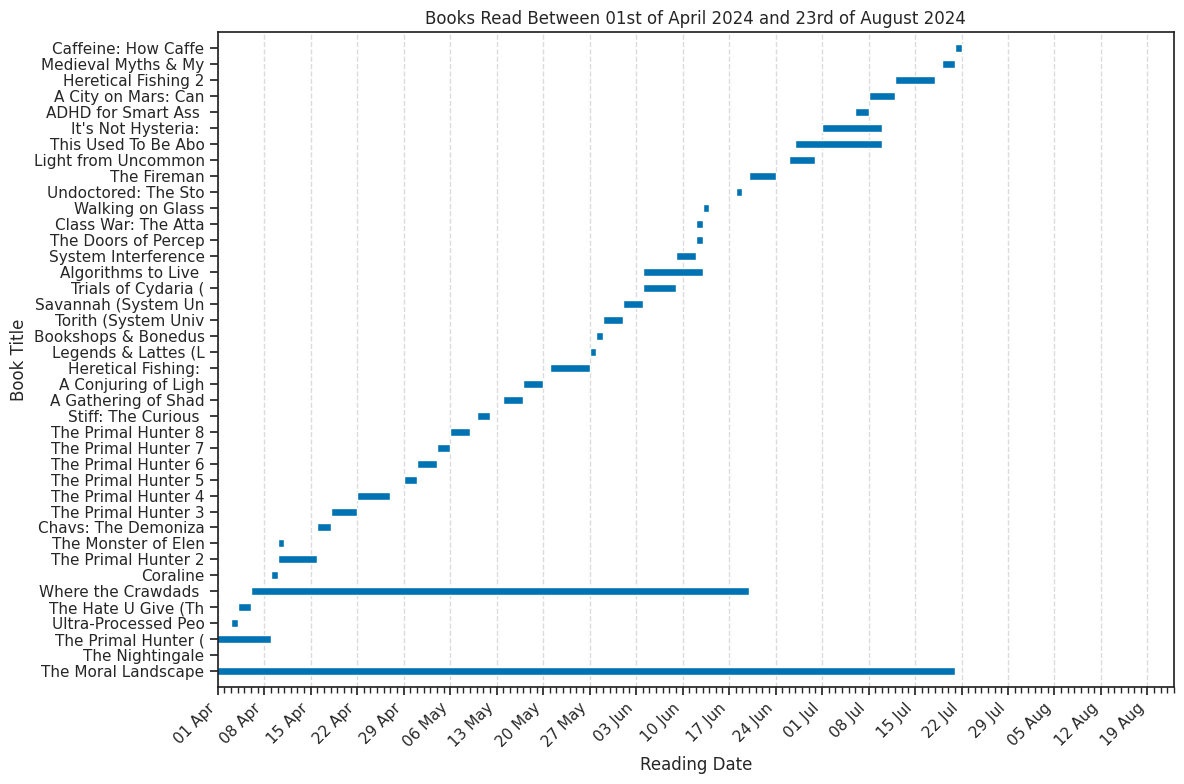

In [40]:
import matplotlib.dates as mdates
from datetime import timedelta

# Define the start and end dates
start_date = pd.to_datetime('2024-04-01')
end_date = pd.to_datetime('2024-08-23')

# Filter the dataframe to only include rows where the book was read between the start and end dates
df = read_bookshelf[(read_bookshelf['end_0'] >= start_date) & (read_bookshelf['start_0'] <= end_date)]

# Create a new dataframe with the book title and start/end dates
df_tasks = df[['title', 'start_0', 'end_0', 'number_of_pages']]
df_tasks = df_tasks.copy()
df_tasks['title'] = df_tasks['title'].str.slice(0,19)
df_tasks['start_0'] = pd.to_datetime(df_tasks['start_0'])
df_tasks['end_0'] = pd.to_datetime(df_tasks['end_0'])

# Set a minimum duration of 1 day for visibility
df_tasks['duration'] = (df_tasks['end_0'] - df_tasks['start_0']).apply(lambda x: max(x, timedelta(days=1)))

# Sort the dataframe by start date
df_tasks = df_tasks.sort_values('start_0')

# Create a new column for the y-axis, which will be the book title
df_tasks['y'] = range(1, len(df_tasks)+1)

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the horizontal bars for each task
ax.barh(df_tasks['y'], df_tasks['duration'], left=df_tasks['start_0'], height=0.5, align='center')

# Set the x-axis limits and format the ticks as dates
ax.set_xlim(start_date, end_date)
ax.xaxis_date()

# Format the x-axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))  # Major ticks on Mondays
ax.xaxis.set_minor_locator(mdates.DayLocator())  # Minor ticks every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))  # Format as '01 Apr'

# Rotate and align the tick labels so they look better
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add gridlines for better readability
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Set the y-axis limits and labels
ax.set_ylim(0, len(df_tasks)+1)
ax.set_yticks(df_tasks['y'])
ax.set_yticklabels(df_tasks['title'])

# make title self update depending on dates selected above
def day_suffix(day):
    if 11 <= day <= 13:
        return "th"
    else:
        return {1: "st", 2: "nd", 3: "rd"}.get(day % 10, "th")

start_suffix = day_suffix(start_date.day)
end_suffix = day_suffix(end_date.day)

start_str = start_date.strftime(f"%d{start_suffix} of %B %Y")
end_str = end_date.strftime(f"%d{end_suffix} of %B %Y")

ax.set_title(f"Books Read Between {start_str} and {end_str}")
ax.set_xlabel('Reading Date')
ax.set_ylabel('Book Title')

# Adjust layout to prevent cutoff of tick labels
plt.tight_layout()

# Show the plot
plt.show()

# Predict Read Times - Again!

This time we'll use a mix of data, and we can see which data are more useful in prediction of read times.

Cross-validation R2 scores:
   CV1      CV2      CV3      CV4     CV5
------  -------  -------  -------  ------
0.0490  -0.2187  -0.0922  -0.2586  0.5014
Mean R2 score: -0.0038

R-squared Score on test set: 0.8062

Sample predictions:
+----+---------------------------+---------------------------------------------------------------------------------------------------+------------+----------------+----------------+-----------------+-------------------+
|    | Estimated Duration (days) |                                               Title                                               | Page Count | Average Rating | Year Published |      Genre      | Number of Ratings |
+----+---------------------------+---------------------------------------------------------------------------------------------------+------------+----------------+----------------+-----------------+-------------------+
| 0  |            3.1            |                                         Tell Me How to Be             

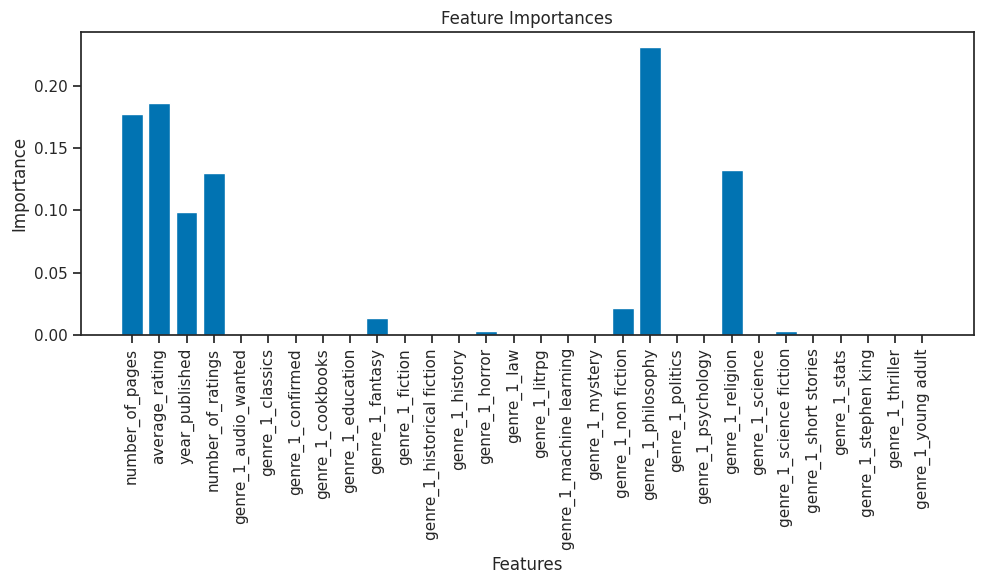

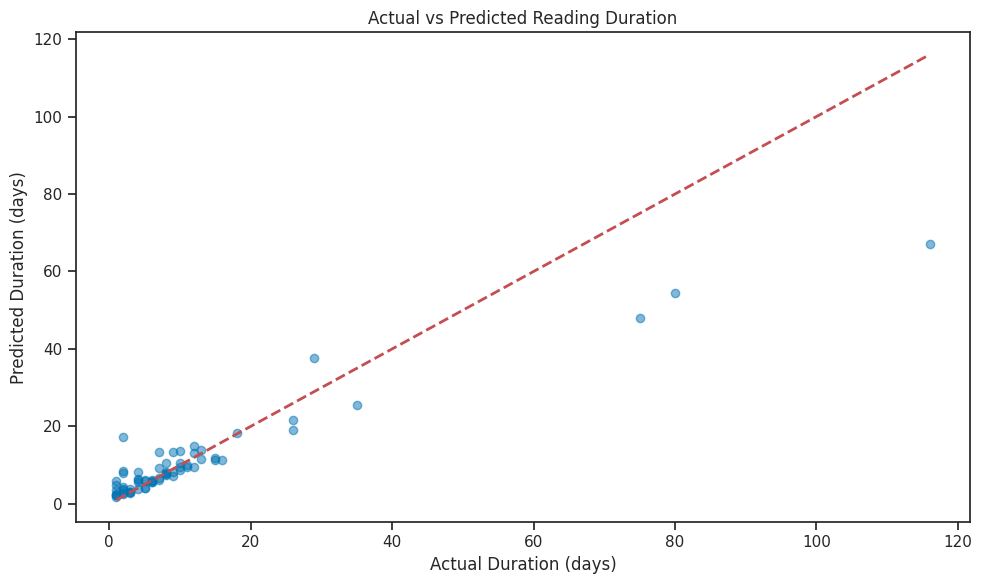

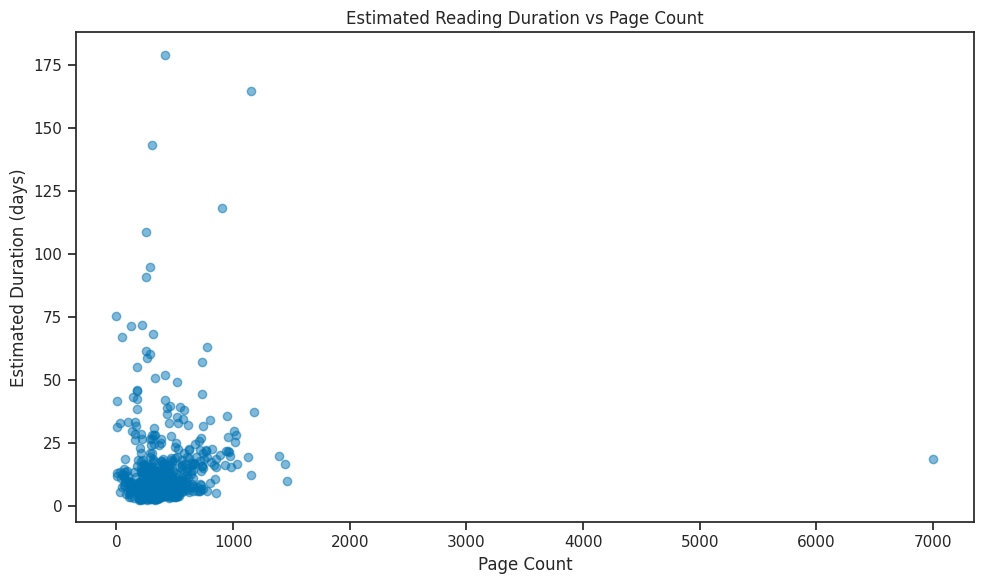

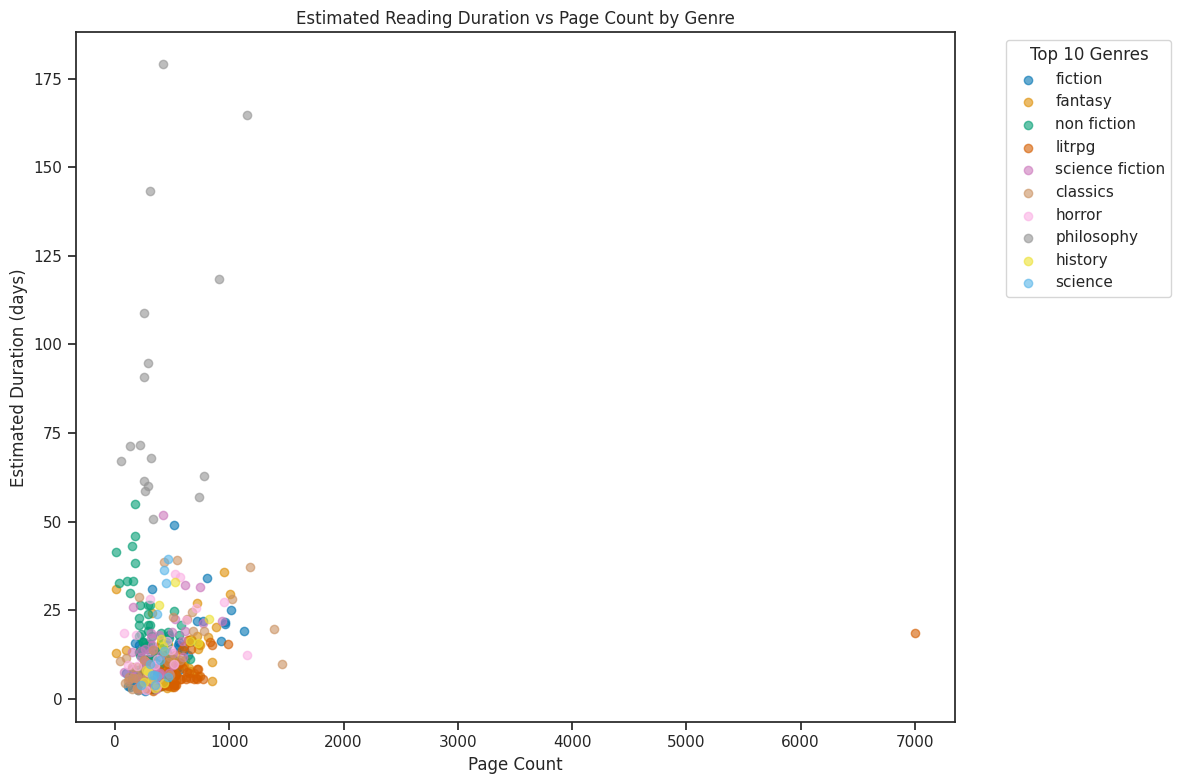


Summary Statistics for Top 10 Genres:
+-----------------+---------------------------------------+-----------------------------------------+--------------------------------------+--------------------------------------+------------------------+--------------------------+-----------------------+-----------------------+
|      Genre      | ('Estimated Duration (days)', 'mean') | ('Estimated Duration (days)', 'median') | ('Estimated Duration (days)', 'min') | ('Estimated Duration (days)', 'max') | ('Page Count', 'mean') | ('Page Count', 'median') | ('Page Count', 'min') | ('Page Count', 'max') |
+-----------------+---------------------------------------+-----------------------------------------+--------------------------------------+--------------------------------------+------------------------+--------------------------+-----------------------+-----------------------+
|    classics     |          13.075526315789475           |                  9.575                  |                 2.3

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from tabulate import tabulate

# Create copies of the original dataframes
read_df = read_bookshelf.copy()
to_read_df = to_read_bookshelf.copy()

# Calculate duration for read_df
read_df['duration'] = pd.to_datetime(read_df['end_0']) - pd.to_datetime(read_df['start_0'])

# Filter the data based on the specified date range and duration
read_df = read_df[(read_df['duration'] > pd.to_timedelta(0)) & (read_df['duration'] <= pd.to_timedelta('365 days'))]

# Remove rows with missing values for the required columns
read_df = read_df.dropna(subset=['duration', 'number_of_pages', 'average_rating', 'year_published', 'genre_1', 'number_of_ratings'])

# Get the duration for each book in read_df as the target variable (in days)
y = read_df['duration'].dt.total_seconds() / (24 * 3600)

# Select the input features
X = read_df[['number_of_pages', 'average_rating', 'year_published', 'genre_1', 'number_of_ratings']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define features
numeric_features = ['number_of_pages', 'average_rating', 'year_published', 'number_of_ratings']
categorical_features = ['genre_1']

# Create preprocessor
numeric_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation R2 scores:")
print(tabulate([cv_scores], headers=['CV1', 'CV2', 'CV3', 'CV4', 'CV5'], floatfmt='.4f'))
print(f"Mean R2 score: {cv_scores.mean():.4f}")

# Fit the model on all training data
model.fit(X, y)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate and print R-squared score
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test set: {r2:.4f}")

# Make predictions on to_read_df
to_read_X = to_read_df[['number_of_pages', 'average_rating', 'year_published', 'genre_1', 'number_of_ratings']]

# Handle NaN values
numeric_cols = ['number_of_pages', 'average_rating', 'year_published', 'number_of_ratings']
to_read_X.loc[:, numeric_cols] = to_read_X[numeric_cols].fillna(to_read_X[numeric_cols].median())
to_read_X.loc[:, 'genre_1'] = to_read_X['genre_1'].fillna(to_read_X['genre_1'].mode()[0])

# Make predictions and ensure they're non-negative
to_read_y_pred = np.maximum(model.predict(to_read_X), 0)

# Create results DataFrame
results = pd.DataFrame({
    'Estimated Duration (days)': to_read_y_pred,
    'Title': to_read_df['title'],
    'Page Count': to_read_df['number_of_pages'],
    'Average Rating': to_read_df['average_rating'],
    'Year Published': to_read_df['year_published'],
    'Genre': to_read_df['genre_1'],
    'Number of Ratings': to_read_df['number_of_ratings']
})

# Print some sample predictions
print("\nSample predictions:")
print(tabulate(results.head(10), headers='keys', tablefmt='pretty', floatfmt='.2f'))

# Print top and bottom 10 predictions
print("\nTop 10 books estimated to take the longest to read:")
print(tabulate(results.sort_values('Estimated Duration (days)', ascending=False).head(10), headers='keys', tablefmt='pretty', floatfmt='.2f'))

print("\nTop 10 books estimated to take the shortest to read:")
print(tabulate(results.sort_values('Estimated Duration (days)', ascending=True).head(10), headers='keys', tablefmt='pretty', floatfmt='.2f'))

# Plot feature importances
feature_importance = model.named_steps['regressor'].feature_importances_
feature_names = (numeric_features +
                 model.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .get_feature_names_out(categorical_features).tolist())

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (days)')
plt.ylabel('Predicted Duration (days)')
plt.title('Actual vs Predicted Reading Duration')
plt.tight_layout()
plt.show()

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results['Page Count'], results['Estimated Duration (days)'], alpha=0.5)
plt.xlabel('Page Count')
plt.ylabel('Estimated Duration (days)')
plt.title('Estimated Reading Duration vs Page Count')
plt.tight_layout()
plt.show()

# New plot for Genre 1 vs Estimated Duration vs Page Count
plt.figure(figsize=(12, 8))

# Get the top 10 most common genres
top_genres = results['Genre'].value_counts().nlargest(10).index

# Plot each genre
for genre in top_genres:
    genre_data = results[results['Genre'] == genre]
    plt.scatter(genre_data['Page Count'],
                genre_data['Estimated Duration (days)'],
                label=genre,
                alpha=0.6)

plt.xlabel('Page Count')
plt.ylabel('Estimated Duration (days)')
plt.title('Estimated Reading Duration vs Page Count by Genre')
plt.legend(title='Top 10 Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print summary statistics for top 10 genres
top_genre_stats = results[results['Genre'].isin(top_genres)].groupby('Genre').agg({
    'Estimated Duration (days)': ['mean', 'median', 'min', 'max'],
    'Page Count': ['mean', 'median', 'min', 'max']
})

print("\nSummary Statistics for Top 10 Genres:")
print(tabulate(top_genre_stats, headers='keys', tablefmt='pretty', floatfmt='.2f'))

#Word Cloud for Genres

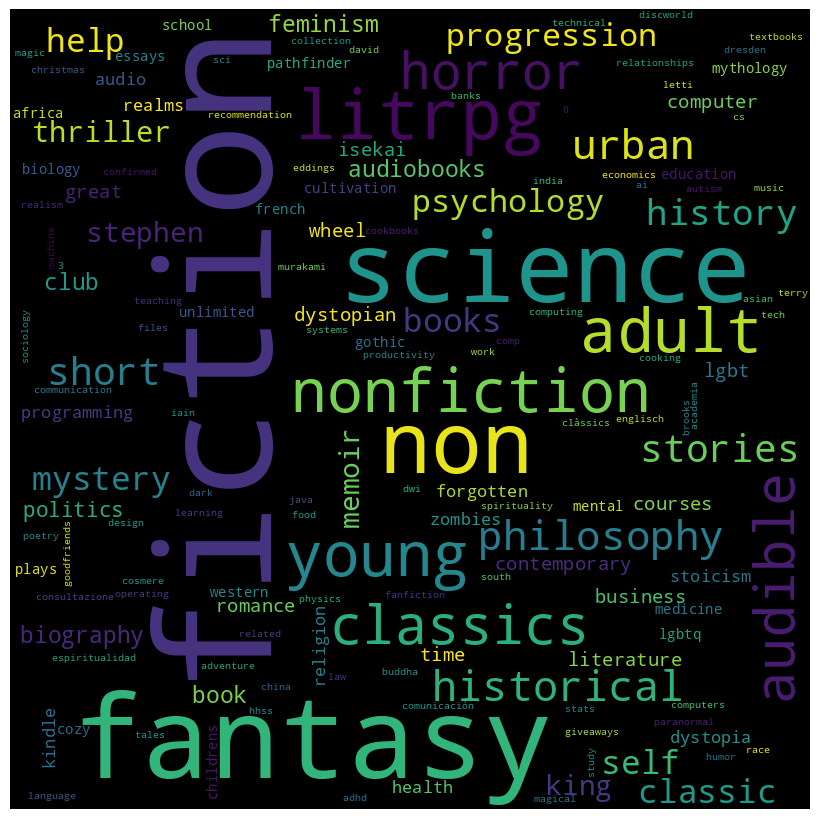

In [43]:
# Get all genres
genres = " ".join(genre for genre in bookshelf_all_genres['genre'])

# Load stopwords
stopwords_list = set(stopwords.words('english'))

# Remove stopwords and non-alphanumeric characters
word_tokens = [word for word in word_tokenize(genres.lower()) if word not in stopwords_list and word.isalnum()]

# Count the frequency of each word
word_counts = Counter(word_tokens)

# Plot the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate_from_frequencies(word_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# Sentiment Analysis

Sentiment analysis is analyzing a text for emotional content. Let's see what the titles of the books read flag in terms emotional content.

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the necessary NLTK resources
nltk.download('vader_lexicon')

# Get all titles and ratings
titles = read_bookshelf['title'].copy()
ratings = read_bookshelf['my_rating'].copy()

# Load stopwords
stopwords_list = set(stopwords.words('english'))

# Preprocess each title and perform sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = []

for title in titles:
    # Remove stopwords and special symbols
    filtered_title = " ".join([word for word in title.lower().split() if word not in stopwords_list])
    filtered_title = ''.join(e for e in filtered_title if (e.isalnum() or e.isspace()))

    # Perform sentiment analysis
    sentiment = sia.polarity_scores(filtered_title)
    sentiment_scores.append(sentiment['compound'])

# Create a dataframe to store the sentiment analysis, title, and rating
# df = pd.DataFrame({'Title': titles, 'Sentiment': sentiment_scores, 'Rating': ratings})


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


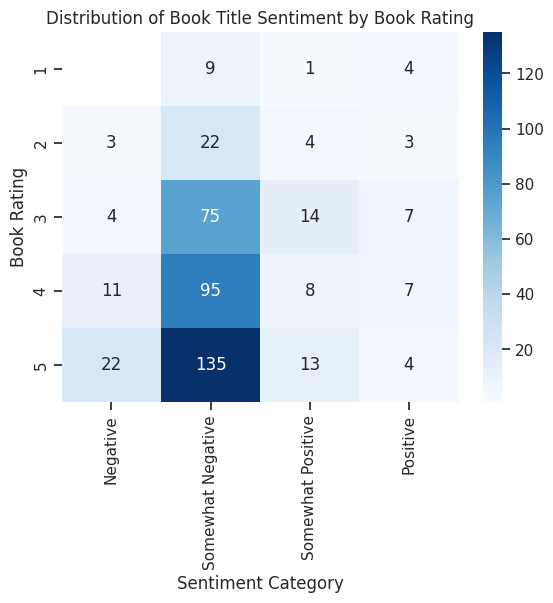

In [45]:
# Create a dataframe with sentiment score, book rating, and count
df = pd.DataFrame({'Sentiment': sentiment_scores,
                   'Rating': read_bookshelf['my_rating'],
                   'Count': 1})

# Bin the sentiment scores into categories
df['Sentiment Category'] = pd.cut(df['Sentiment'], bins=[-1, -0.5, 0, 0.5, 1],
                                  labels=['Negative', 'Somewhat Negative', 'Somewhat Positive', 'Positive'])

# Group by rating and sentiment category to get the count for each combination
df_agg = df.groupby(['Rating', 'Sentiment Category'], observed=True).agg({'Count': 'sum'}).reset_index()  # Explicitly set observed=True

# Reshape the data to wide format for plotting
heatmap_data = df_agg.pivot(index='Rating', columns='Sentiment Category', values='Count')

# Create the heatmap
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.0f')

# Set the axis labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Book Rating')
plt.title('Distribution of Book Title Sentiment by Book Rating')
plt.show()


## Review Sentiment Analysis

In [46]:
from nltk.corpus import stopwords  # Import stopwords function

# Download Vader Lexicon (assuming it's not already downloaded)
# nltk.download('vader_lexicon')  # Uncomment if needed

# Get all reviews, titles, and ratings
reviews = read_bookshelf['my_review'].copy()
titles = read_bookshelf['title'].copy()
ratings = read_bookshelf['my_rating'].copy()

# Filter out books without a review
has_review_mask = reviews.notnull()
reviews = reviews[has_review_mask]
titles = titles[has_review_mask]
ratings = ratings[has_review_mask]

# Preprocess each review and perform sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = []
english_stops = set(stopwords.words('english'))  # Get English stopwords

for review in reviews:
  # Remove stopwords and special symbols
  filtered_review = " ".join([word for word in review.lower().split() if word not in english_stops])
  filtered_review = ''.join(e for e in filtered_review if (e.isalnum() or e.isspace()))

  # Perform sentiment analysis
  sentiment = sia.polarity_scores(filtered_review)
  sentiment_scores.append(sentiment['compound'])

# Create a dataframe to store the sentiment analysis, title, review, and rating
df = pd.DataFrame({'Title': titles, 'Review': reviews, 'Sentiment': sentiment_scores, 'Rating': ratings})

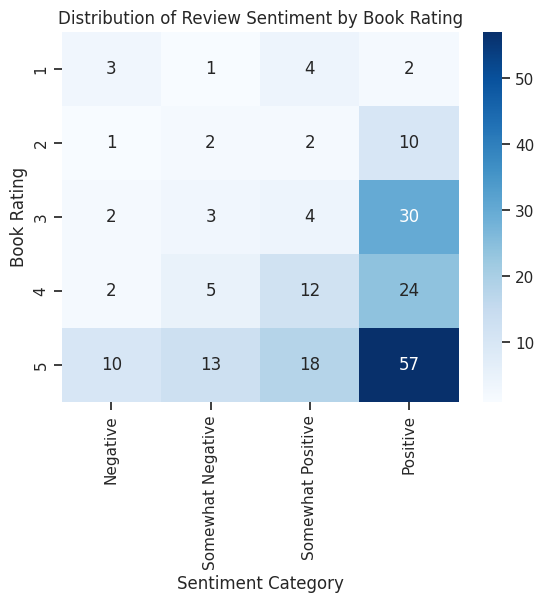

In [47]:
# Bin the sentiment scores into categories
df['Sentiment Category'] = pd.cut(df['Sentiment'], bins=[-1, -0.5, 0, 0.5, 1],
                                   labels=['Negative', 'Somewhat Negative', 'Somewhat Positive', 'Positive'])

# Group by rating and sentiment category to get the count for each combination
df_agg = df.groupby(['Rating', 'Sentiment Category'], observed=True).size().reset_index(name='Count')

# Reshape the data to wide format for plotting
heatmap_data = df_agg.pivot(index='Rating', columns='Sentiment Category', values='Count')

# Create the heatmap
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')

# Set the axis labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Book Rating')
plt.title('Distribution of Review Sentiment by Book Rating')
plt.show()

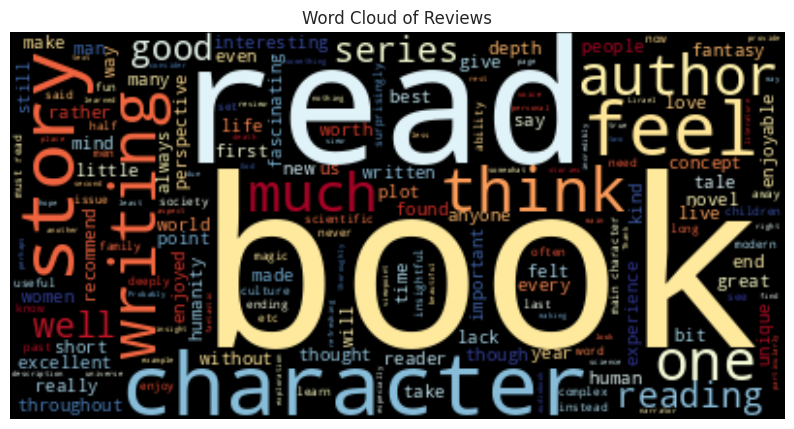

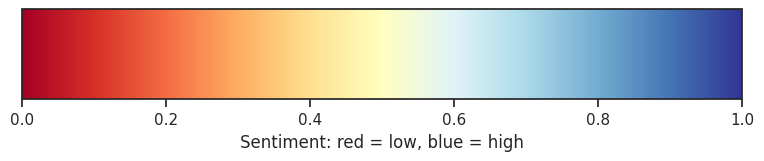

In [48]:
import re
import pylab as pl

colormap = 'RdYlBu'

# Join all reviews into a single string
# Use the 'Review' column from the DataFrame 'df'
reviews = ' '.join(df['Review'].dropna())
reviews = re.sub(r'<br/>', '', reviews)

# Define the color map for the sentiment categories
color_map = {'Negative': 'Red', 'Somewhat Negative': 'Orange',
             'Somewhat Positive': 'LightBlue', 'Positive': 'Blue'}

# Create a WordCloud object
wordcloud = WordCloud(background_color='black', colormap=colormap)

# Generate the word cloud
wordcloud.generate(reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# 2d array for plotting colorbar
colorbar_data = np.array([[0, 1]])
plt.figure(figsize=(9, 1.5))
colorbar_img = plt.imshow(colorbar_data, cmap=colormap)

# hide axis
plt.gca().set_visible(False)
colorbar_axes = plt.axes([0.1, 0.2, 0.8, 0.6])

# Display the plot
colorbar = plt.colorbar(orientation="horizontal", cax=colorbar_axes)
colorbar.set_label('Sentiment: red = low, blue = high')
plt.show()